In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model

from mlxtend.classifier import StackingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score, precision_score, RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
from sklearn.metrics import confusion_matrix , classification_report


from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [5]:
abosalah="diabetes_012_health_indicators_BRFSS2015.csv"
data= pd.read_csv(abosalah)
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
data["Diabetes_012"] = data["Diabetes_012"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int32
 1   HighBP                253680 non-null  int32
 2   HighChol              253680 non-null  int32
 3   CholCheck             253680 non-null  int32
 4   BMI                   253680 non-null  int32
 5   Smoker                253680 non-null  int32
 6   Stroke                253680 non-null  int32
 7   HeartDiseaseorAttack  253680 non-null  int32
 8   PhysActivity          253680 non-null  int32
 9   Fruits                253680 non-null  int32
 10  Veggies               253680 non-null  int32
 11  HvyAlcoholConsump     253680 non-null  int32
 12  AnyHealthcare         253680 non-null  int32
 13  NoDocbcCost           253680 non-null  int32
 14  GenHlth               253680 non-null  int32
 15  MentHlth              253680 non-n

In [8]:
# df.shape
print(f"Num rows: {len(data)}")
print(f"Num columns: {len(data.columns)}")

Num rows: 253680
Num columns: 22


In [9]:
data.shape


(253680, 22)

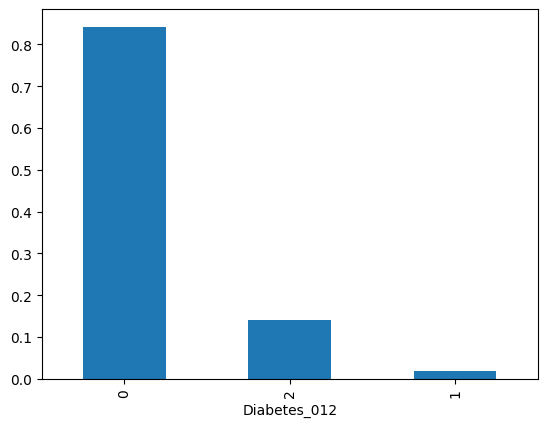

In [10]:
data['Diabetes_012'].value_counts(normalize=True).plot(kind='bar');

# Data types: float64 (12 columns), object (7 columns)


In [11]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [12]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [13]:
data.isnull().sum()


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [14]:
data.isnull().sum().any()

False

# There is no mising data


In [15]:
data.duplicated().sum()

23899

In [16]:
data.loc[data.duplicated(),:]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,2,1,1,1,27,1,0,0,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,2,1,1,1,33,0,0,0,1,1,...,1,0,3,0,0,0,1,9,6,6
253550,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,7,6,8
253563,0,0,1,1,24,1,0,0,1,1,...,1,0,2,0,0,0,1,8,6,8
253597,0,0,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8


# There are 23899 dupicated rows so they should be removed

In [17]:
data.drop_duplicates(inplace=True)

In [18]:
data.shape

(229781, 22)

<Axes: >

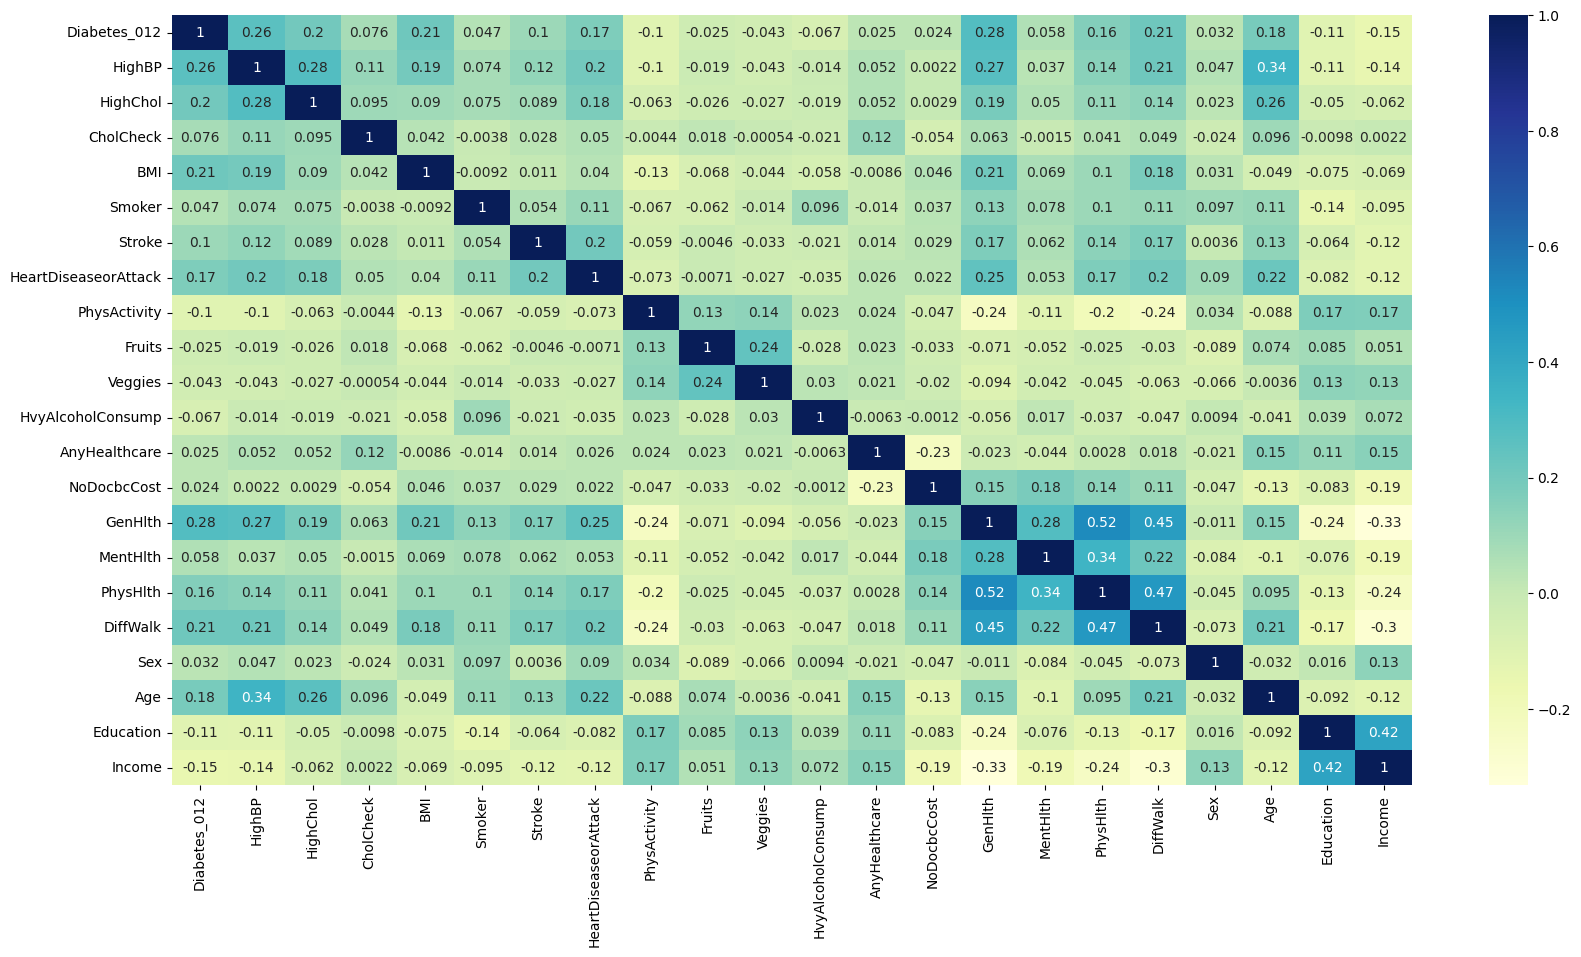

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [20]:
df_vis=data.copy()

In [21]:
#transform data
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 0] = 'No Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 1] = 'Pre Diabetes'
df_vis.Diabetes_012[df_vis['Diabetes_012'] == 2] = 'Diabetes'

df_vis.HighBP[df_vis['HighBP'] == 0] = 'No High'
df_vis.HighBP[df_vis['HighBP'] == 1] = 'High BP'

df_vis.HighChol[df_vis['HighChol'] == 0] = 'No High Cholesterol'
df_vis.HighChol[df_vis['HighChol'] == 1] = 'High Cholesterol'

df_vis.CholCheck[df_vis['CholCheck'] == 0] = 'No Cholesterol Check in 5 Years'
df_vis.CholCheck[df_vis['CholCheck'] == 1] = 'Cholesterol Check in 5 Years'

df_vis.Smoker[df_vis['Smoker'] == 0] = 'No'
df_vis.Smoker[df_vis['Smoker'] == 1] = 'Yes'

df_vis.Stroke[df_vis['Stroke'] == 0] = 'No'
df_vis.Stroke[df_vis['Stroke'] == 1] = 'Yes'

df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 0] = 'No'
df_vis.HeartDiseaseorAttack[df_vis['HeartDiseaseorAttack'] == 1] = 'Yes'

df_vis.PhysActivity[df_vis['PhysActivity'] == 0] = 'No'
df_vis.PhysActivity[df_vis['PhysActivity'] == 1] = 'Yes'

df_vis.Fruits[df_vis['Fruits'] == 0] = 'No'
df_vis.Fruits[df_vis['Fruits'] == 1] = 'Yes'

df_vis.Veggies[df_vis['Veggies'] == 0] = 'No'
df_vis.Veggies[df_vis['Veggies'] == 1] = 'Yes'

df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 0] = 'No'
df_vis.HvyAlcoholConsump[df_vis['HvyAlcoholConsump'] == 1] = 'Yes'

df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 0] = 'No'
df_vis.AnyHealthcare[df_vis['AnyHealthcare'] == 1] = 'Yes'

df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 0] = 'No'
df_vis.NoDocbcCost[df_vis['NoDocbcCost'] == 1] = 'Yes'
df_vis.GenHlth[df_vis['GenHlth'] == 1] = 'Excellent'
df_vis.GenHlth[df_vis['GenHlth'] == 2] = 'Very Good'
df_vis.GenHlth[df_vis['GenHlth'] == 3] = 'Good'
df_vis.GenHlth[df_vis['GenHlth'] == 4] = 'Fair'
df_vis.GenHlth[df_vis['GenHlth'] == 5] = 'Poor'

df_vis.DiffWalk[df_vis['DiffWalk'] == 0] = 'No'
df_vis.DiffWalk[df_vis['DiffWalk'] == 1] = 'Yes'

df_vis.Sex[df_vis['Sex'] == 0] = 'Female'
df_vis.Sex[df_vis['Sex'] == 1] = 'Male'

df_vis.Education[df_vis['Education'] == 1] = 'Never Attended School'
df_vis.Education[df_vis['Education'] == 2] = 'Elementary'
df_vis.Education[df_vis['Education'] == 3] = 'Some high school'
df_vis.Education[df_vis['Education'] == 4] = 'High school graduate'
df_vis.Education[df_vis['Education'] == 5] = 'Some college or technical school'
df_vis.Education[df_vis['Education'] == 6] = 'College graduate'

df_vis.Income[df_vis['Income'] == 1] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 2] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 3] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 4] = 'Less Than $10,000'
df_vis.Income[df_vis['Income'] == 5] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 6] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 7] = 'Less Than $35,000'
df_vis.Income[df_vis['Income'] == 8] = '$75,000 or More'

# Visualizing Data

In [22]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [23]:
cols = list(df_vis.columns)
cols_df=cols[1:]

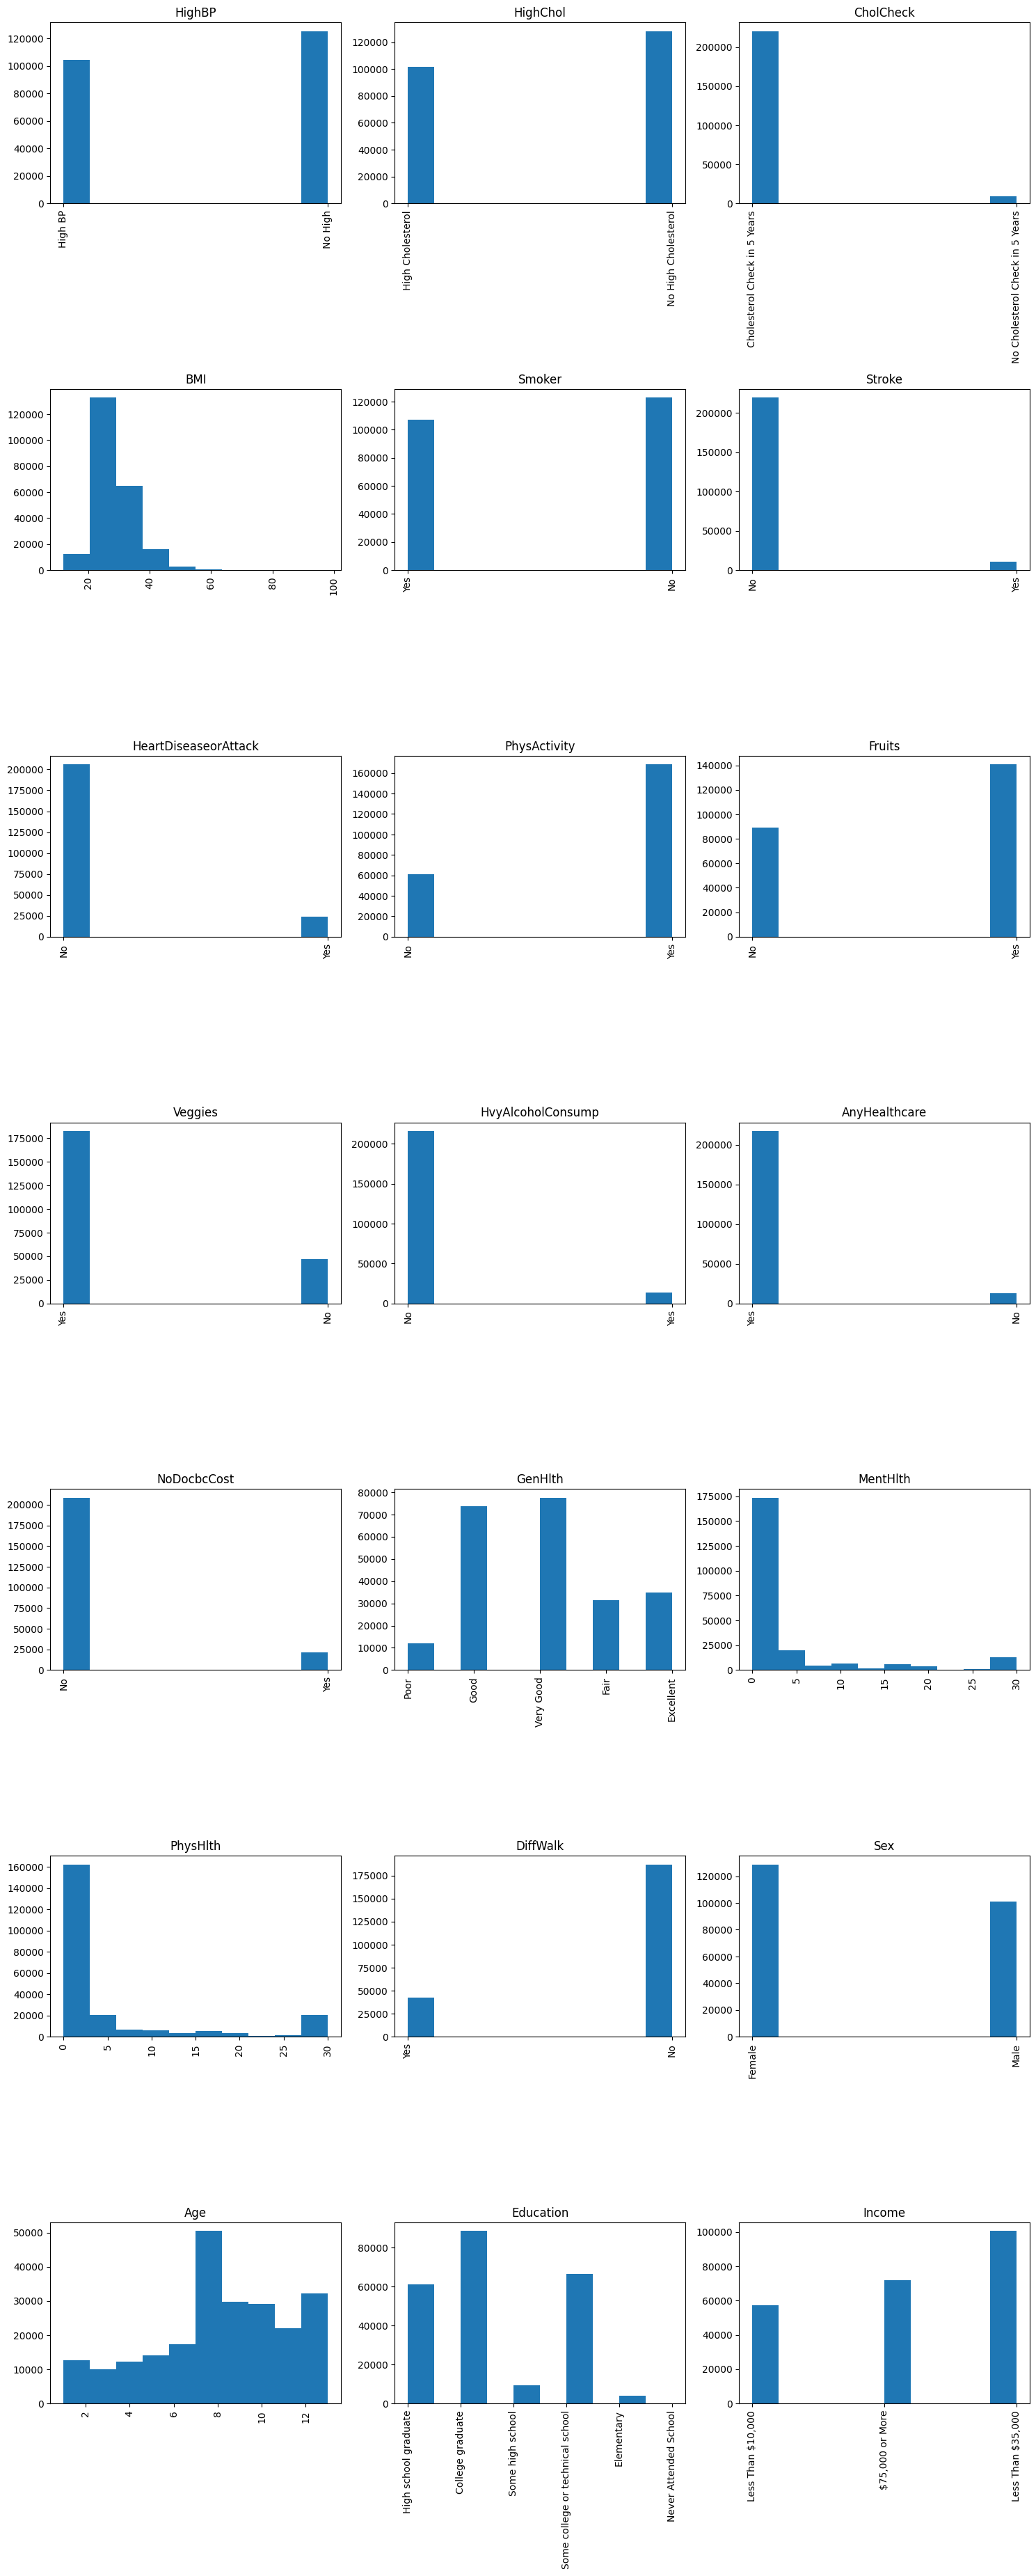

In [24]:
plt.figure(figsize=(15,40))
for i in range(len(cols_df)):
    plt.subplot(8,3,i+1)
    plt.title(cols_df[i])
    plt.xticks(rotation=90)
    plt.hist(df_vis[cols_df[i]])
    
plt.tight_layout()

# Ratio of diabetes in the dataset with their types


In [25]:
df_vis['Diabetes_012'].value_counts()

Diabetes_012
No Diabetes     190055
Diabetes         35097
Pre Diabetes      4629
Name: count, dtype: int64

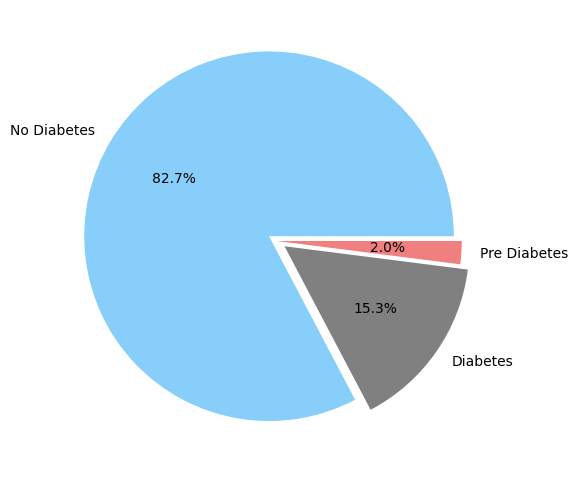

In [26]:
# pie plot of diabetes ratio 
plt.figure(figsize=(8,6))
labels = ['No Diabetes', 'Diabetes', 'Pre Diabetes']
sizes = [df_vis['Diabetes_012'].value_counts()[0], df_vis['Diabetes_012'].value_counts()[1], df_vis['Diabetes_012'].value_counts()[2]]
colors = ['lightskyblue', 'grey', 'lightcoral']
explode = (0.05, 0.05, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, autopct='%.1f%%', colors=colors, data = df_vis);

###"No diabetes" is the most common case in the dataset, followed by "diabetes" and then "pre-diabetes".


# correlation with Diabetes_012 through bar graph


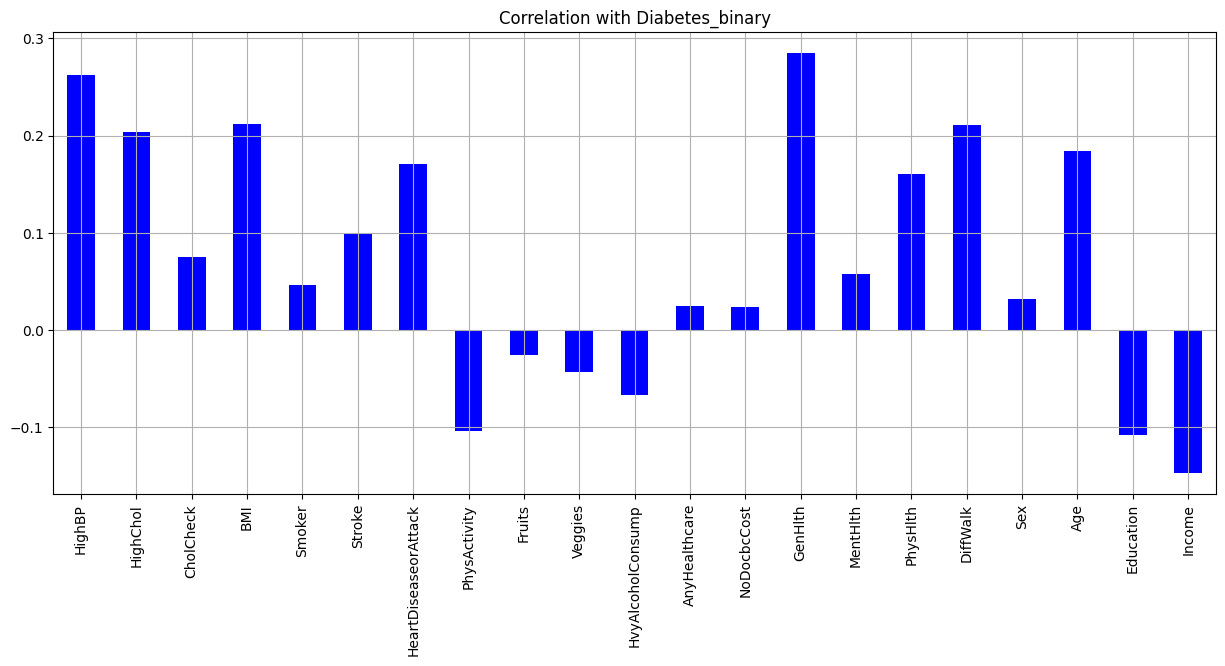

In [27]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(15, 6)
, title="Correlation with Diabetes_binary",color="blue");

# Diabetes_binary's relation with other columns Through bar Graph Result:
1:Fruits , AnyHealthcare , NoDocbccost and sex are least correlated with Diabetes_binary.

2:HighBP , HighChol , BMI , smoker , stroke , HeartDiseaseorAttack , PhysActivity , Veggies , HvyAlcoholconsump , GenHlth , PhysHlth , Age , Education , Income and DiffWalk have a significant correlation with Diabetes_012.


# Distribution of diabetes among genders


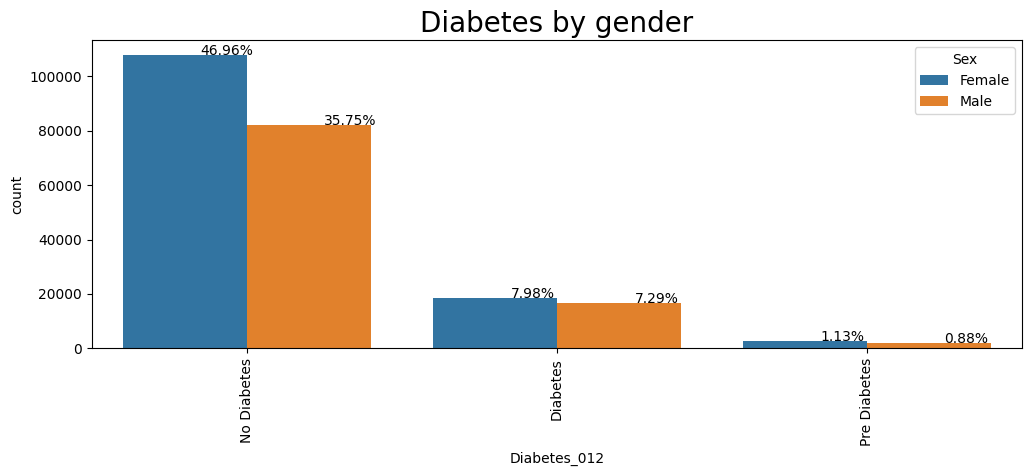

In [28]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_012',data=df_vis,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes by gender',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

Gender has no effect to developing diabetes.


# Smoker

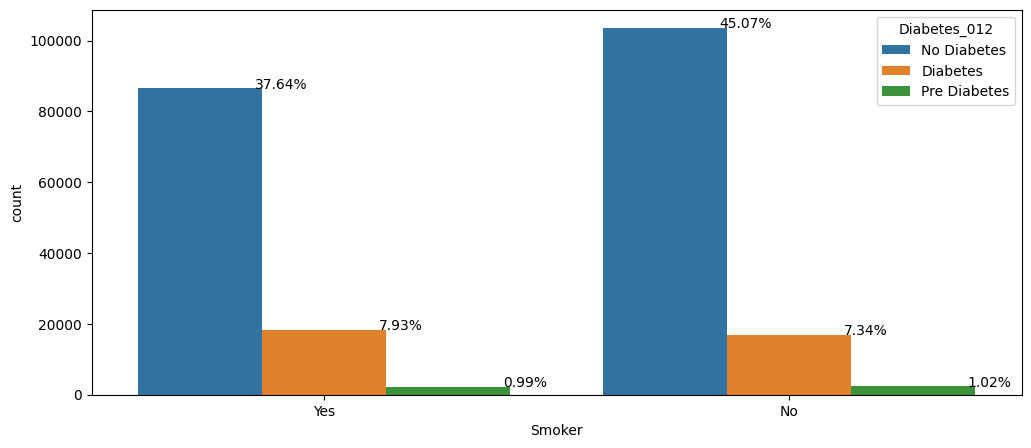

In [29]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='Smoker', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()


# HvyAlcoholConsump

In [30]:
df_vis['HvyAlcoholConsump'].value_counts()

HvyAlcoholConsump
No     215831
Yes     13950
Name: count, dtype: int64

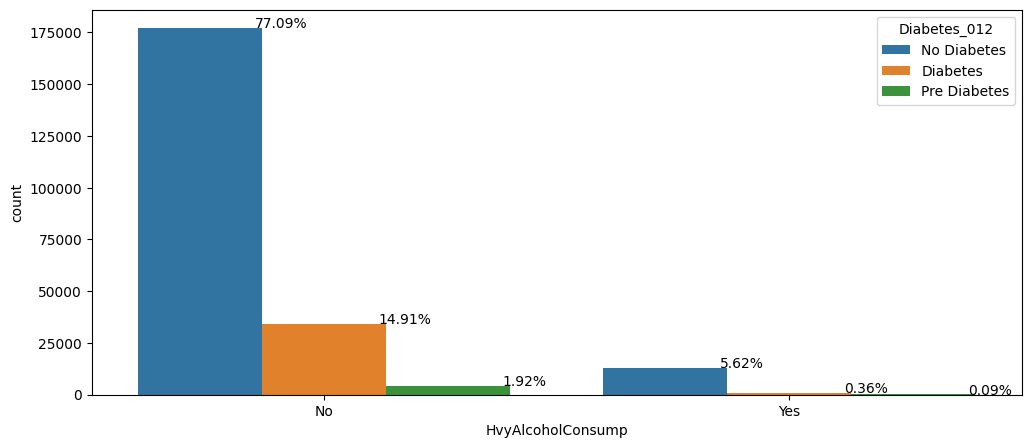

In [31]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HvyAlcoholConsump', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# Smoker and HvyAlcoholConsump's combined effect on Diabetes

Text(0.5, 1.0, 'Relation b/w Smoker ,HvyAlcoholConsump and Diabetes')

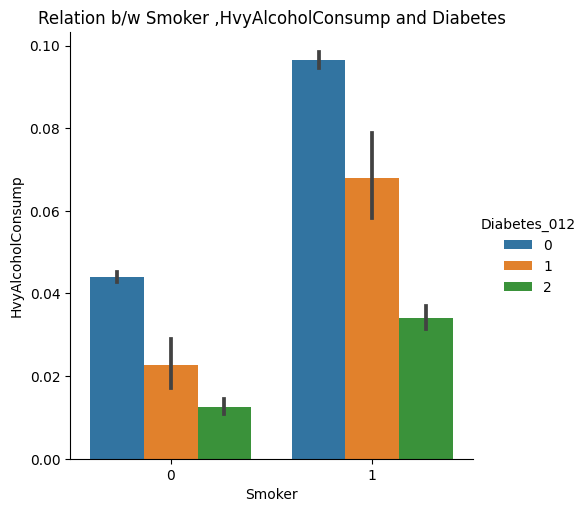

In [32]:
# (1 in Smoker is Yes), (1 in HvyAlcoholConsump is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)

sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = data , hue="Diabetes_012"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

result: Acording to this data, smoking and HvyAlcoholConsump both togather increase the risk of diabetes.



# HeartDiseaseorAttack

<Axes: xlabel='HeartDiseaseorAttack', ylabel='count'>

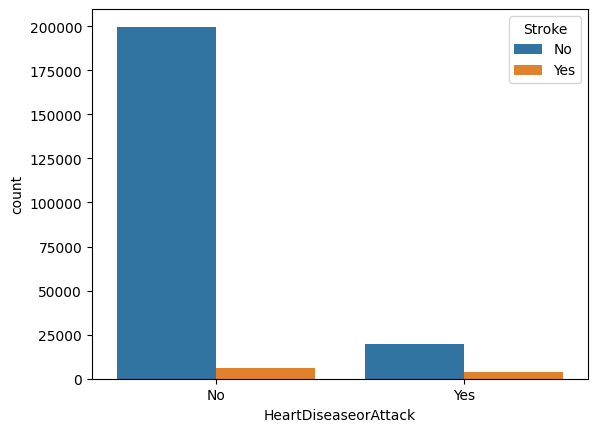

In [33]:
sns.countplot(data=df_vis,x='HeartDiseaseorAttack',hue='Stroke')

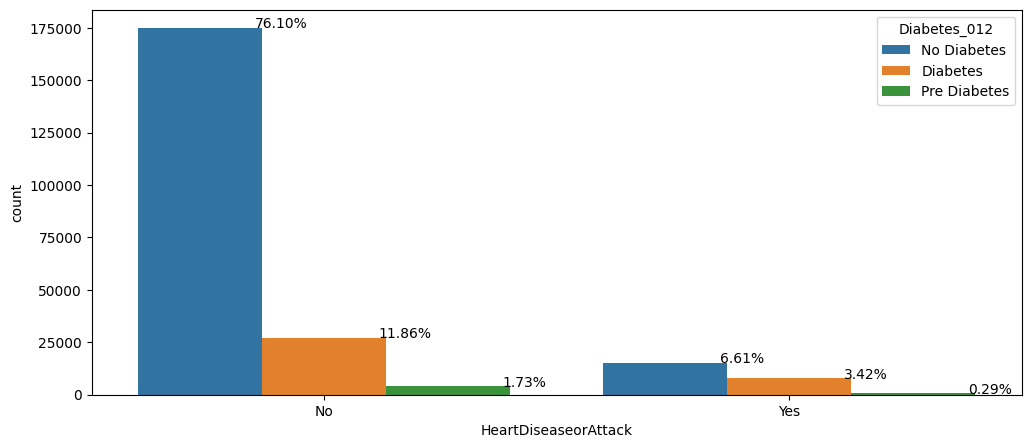

In [34]:
plt.figure(figsize=(12,5))

x= sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_012' , data = df_vis);
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

The chance of diabetes increases as the person has Heart Disease or Attack

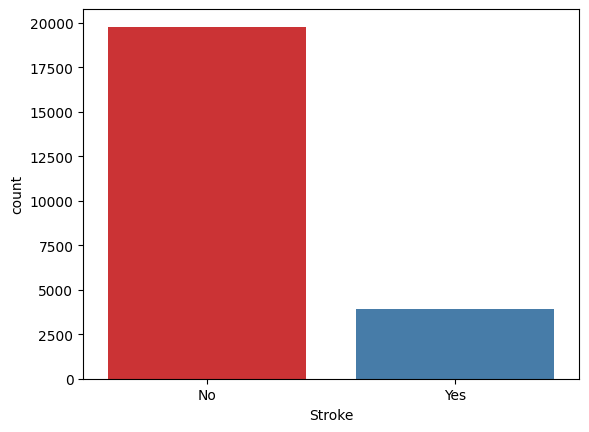

In [35]:
# plt.figure(figsize=(10,6))
sns.countplot(data=df_vis[df_vis['HeartDiseaseorAttack']=="Yes"],x='Stroke',palette='Set1');

It is normal that if the person have heart disease or attack it causes to have stroke

# Stroke and HeartDiseaseorAttack's combined effect on Diabetes


Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

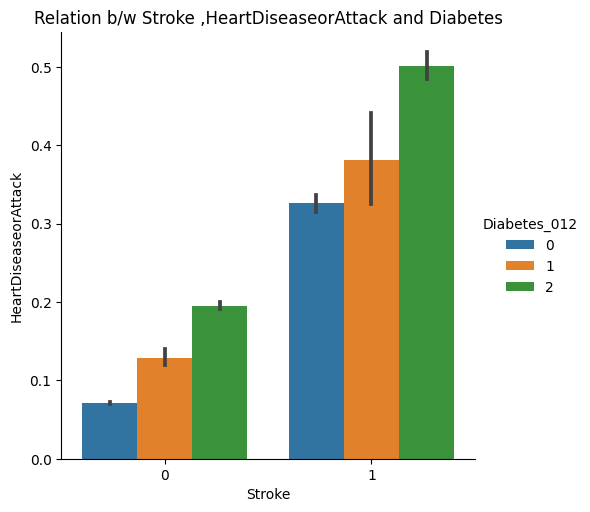

In [36]:
# (1 in Stroke is Yes), (1 in HeartDiseaseorAttack is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = data , hue="Diabetes_012"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

result: Acording to this data, stroke and heartDiseaseorAttack togather increases the risk of Diabetes

# High blood pressure 

<Axes: xlabel='Diabetes_012', ylabel='count'>

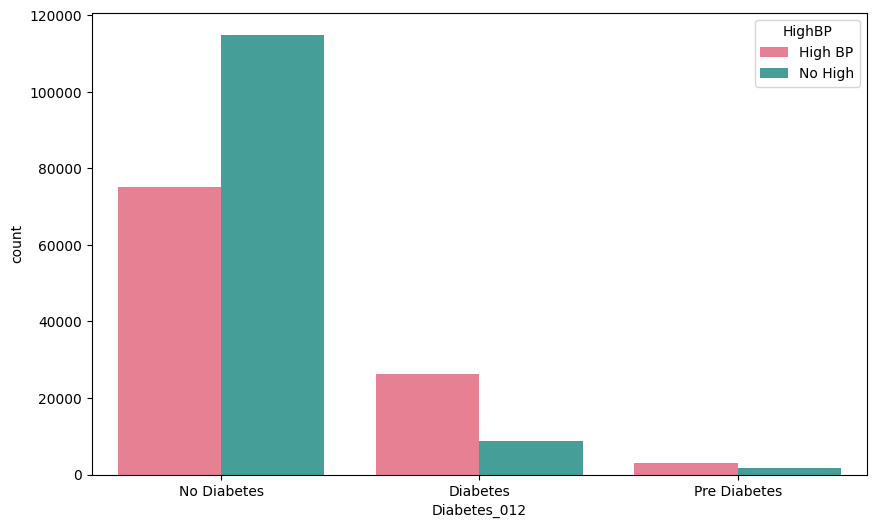

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighBP',palette='husl')

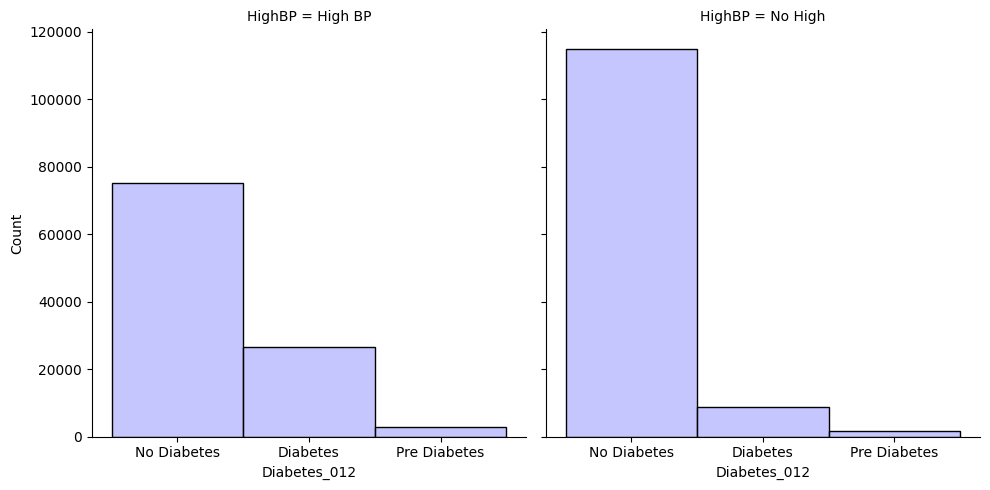

In [38]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighBP',color='#b3b3ff')

# high cholesterol

<Axes: xlabel='Diabetes_012', ylabel='count'>

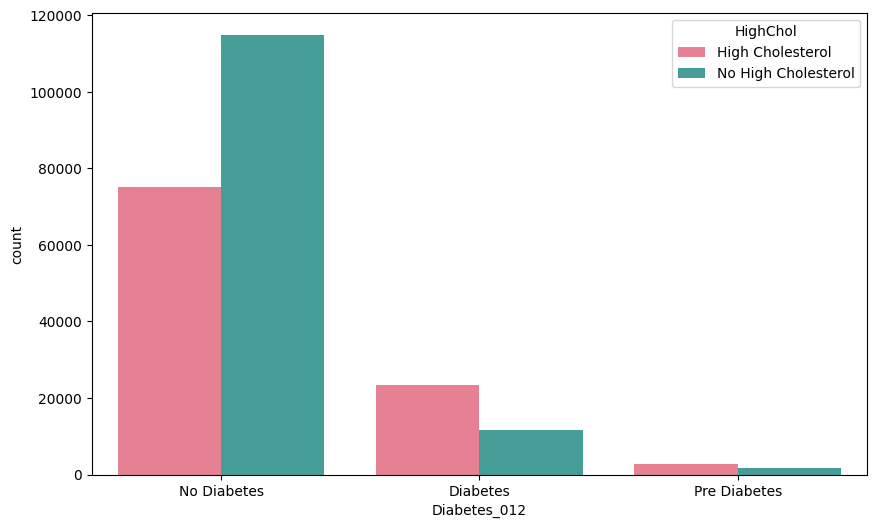

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='HighChol',palette='husl')

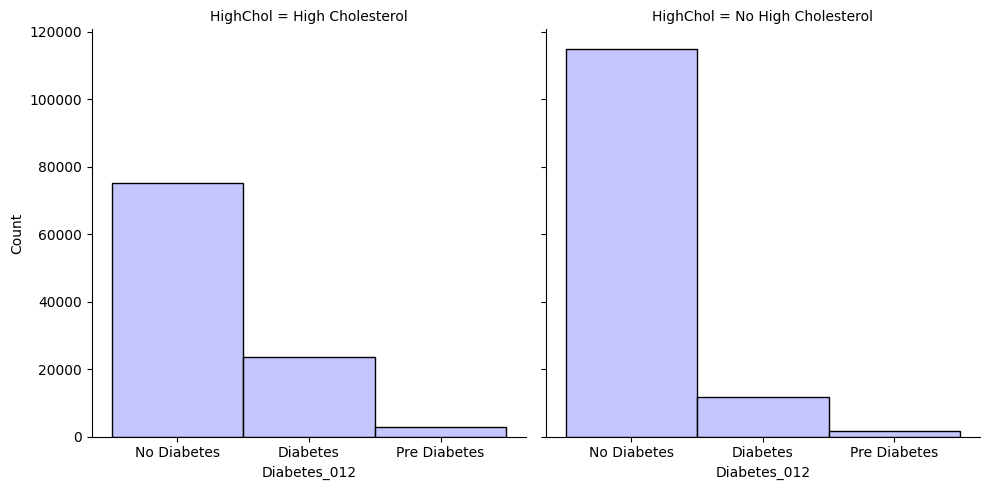

In [40]:
sns.displot(data=df_vis,x='Diabetes_012',col='HighChol',color='#b3b3ff')

Most diabetics tend to have high blood pressure and cholesterol


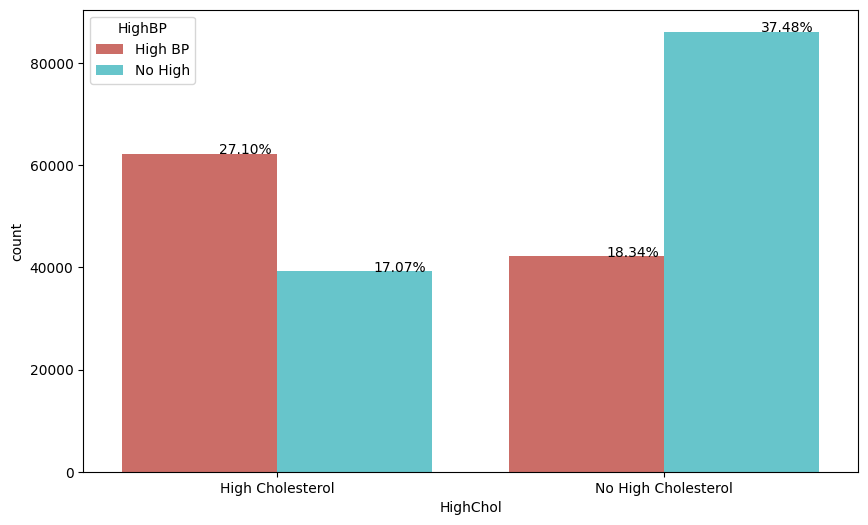

In [41]:
# HighChol with HighBP
plt.figure(figsize=(10,6))
x=sns.countplot(data=df_vis,x='HighChol',hue='HighBP',palette='hls')
for i in x.patches:
    x.annotate('{:.2f}'.format(i.get_height()/df_vis.shape[0]*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

# high cholesterol and high blood pressure are highly related to each other as people with high cholesterol tend to have high blood pressure
The link between high blood pressure and high cholesterol goes in both directions. When the body can’t clear cholesterol from the bloodstream, that excess cholesterol can deposit along artery walls. When arteries become stiff and narrow from deposits, the heart has to work overtime to pump blood through them. This causes blood pressure to go up and up.

# Checking HighBP and HighChol's combined effect on Diabetes


Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

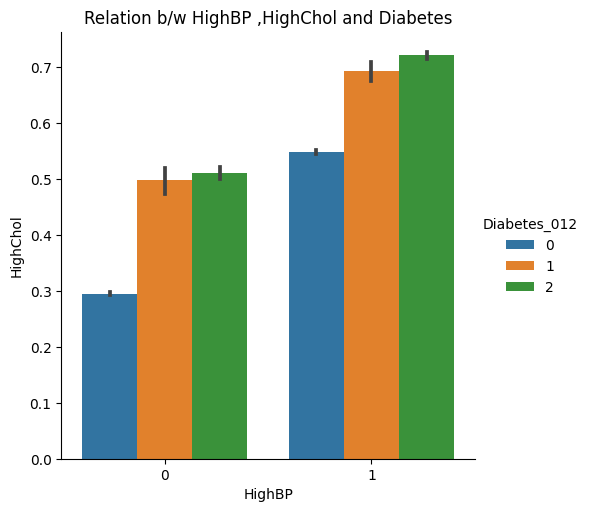

In [42]:
# (1 in HighBP is Yes), (1 in HighChol is Yes), and (0 is No Diabetes, 1 is Pre Diabetes, 2 is Diabetes)  

sns.catplot(x="HighBP" , y ="HighChol" , data = data , hue="Diabetes_012" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

result: Acording to this data, HighBP and HighChol both togather increase the risk of diabetes.



# BMI

<Figure size 1200x500 with 0 Axes>

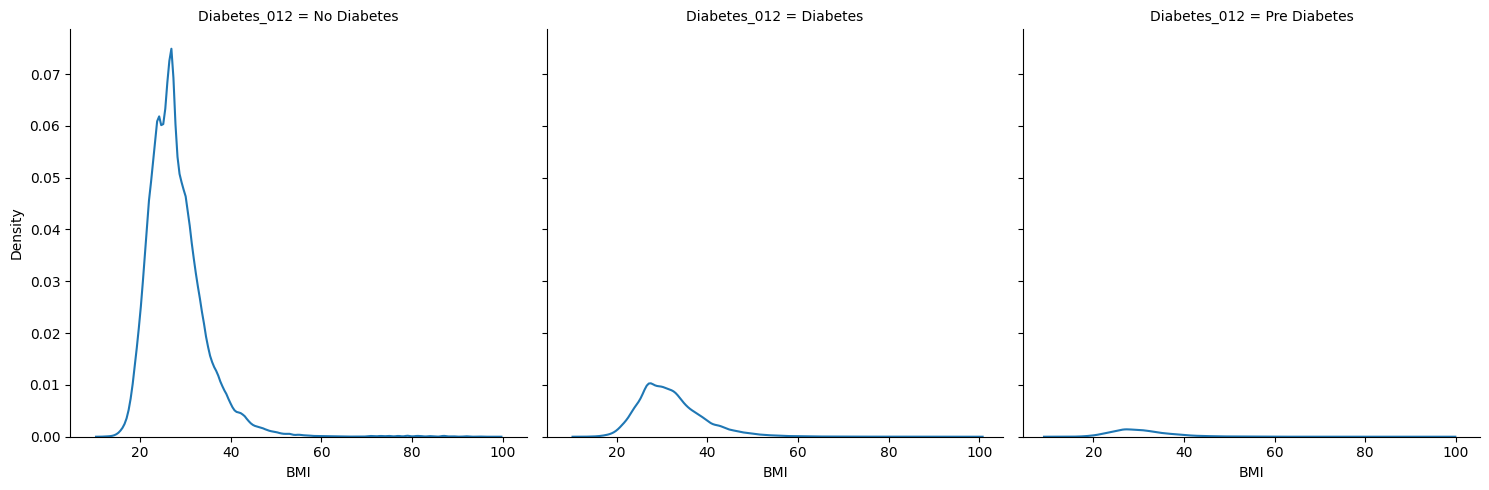

In [43]:
plt.figure(figsize=(12,5))
sns.displot(x='BMI', col='Diabetes_012' , data = df_vis, kind="kde" ,palette="Set2");

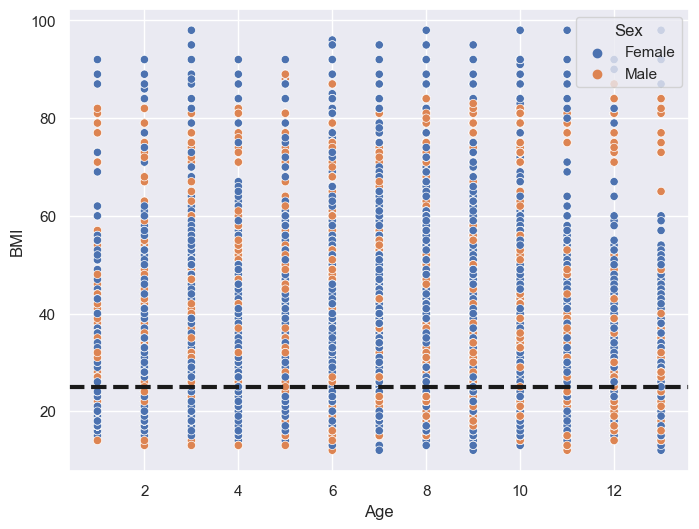

In [44]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,6))
fig = sns.scatterplot(data=df_vis, x="Age", y="BMI", hue='Sex')
fig.axhline(y= 25, linewidth=3, color='k', linestyle= '--')
plt.show()

The BMI of the most peaople is more than the normal


# Split the BMI into (Underweight,Normal weight,Overweight,Obesity)


In [45]:
BMI=pd.cut( data['BMI'],bins=[0,18.5,25,30,80],labels=['Underweight','Normal weight','Overweight','Obesity'])

In [46]:
dd=pd.crosstab(df_vis['Diabetes_012'],BMI,rownames=['Diabetes'])
dd=dd.astype(float)
dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,169.0,5350.0,11419.0,18118.0
No Diabetes,2856.0,67462.0,68505.0,50998.0
Pre Diabetes,28.0,924.0,1631.0,2042.0


In [47]:
Diabetes_sum_lst=list(dd.transpose().sum().values)
Diabetes_sum_lst

[35056.0, 189821.0, 4625.0]

In [48]:
for idx in range(dd.values.shape[0]):
    dd.values[idx]= dd.values[idx]/Diabetes_sum_lst[idx]*100

dd

BMI,Underweight,Normal weight,Overweight,Obesity
Diabetes,,,,
Diabetes,0.482086,15.261296,32.573597,51.683021
No Diabetes,1.504575,35.539798,36.089263,26.866364
Pre Diabetes,0.605405,19.978378,35.264865,44.151351


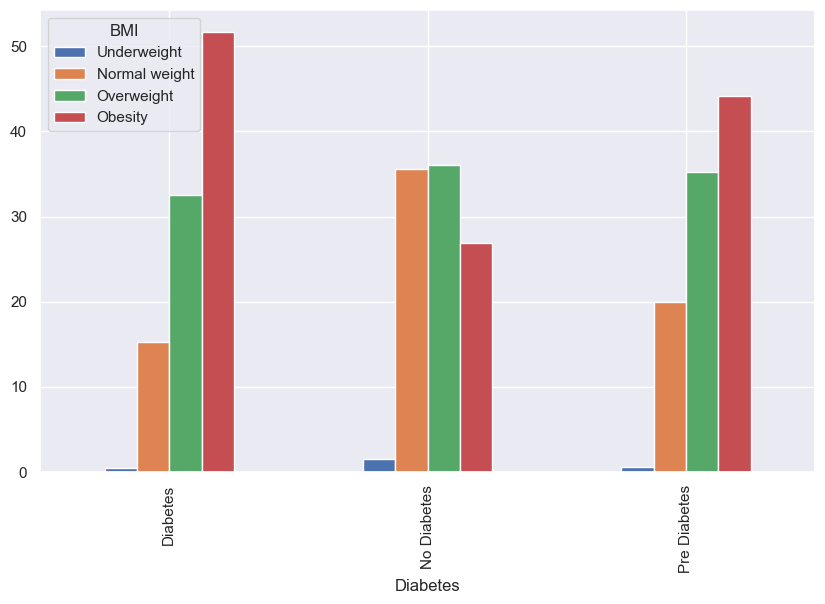

In [49]:
dd.plot(kind="bar",figsize=(10,6));

# Age

<Figure size 1200x500 with 0 Axes>

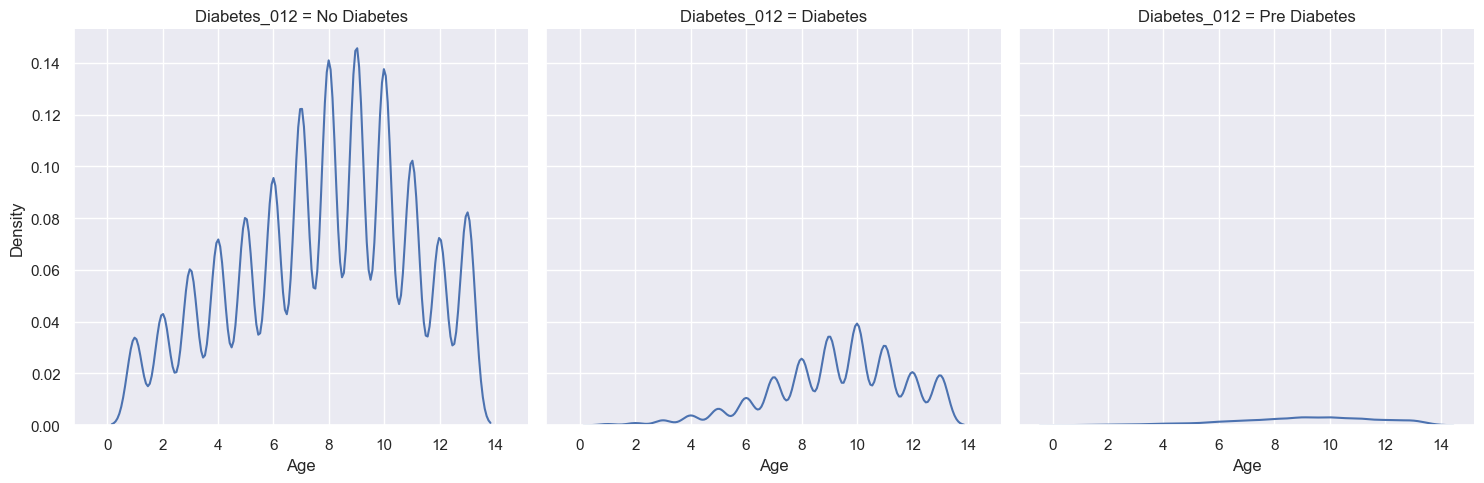

In [50]:
plt.figure(figsize=(12,5))
sns.displot(x='Age', col='Diabetes_012' , data = df_vis, kind="kde")
plt.show()

In [51]:
age = pd.cut(df_vis['Age'],bins=[0,4,7,10,12,14],labels=['18:34','35:49','50:64','65:74','75 and older'])
age

0         50:64
1         35:49
2         50:64
3         65:74
4         65:74
          ...  
253675    35:49
253676    65:74
253677    18:34
253678    35:49
253679    50:64
Name: Age, Length: 229781, dtype: category
Categories (5, object): ['18:34' < '35:49' < '50:64' < '65:74' < '75 and older']

<Figure size 1000x600 with 0 Axes>

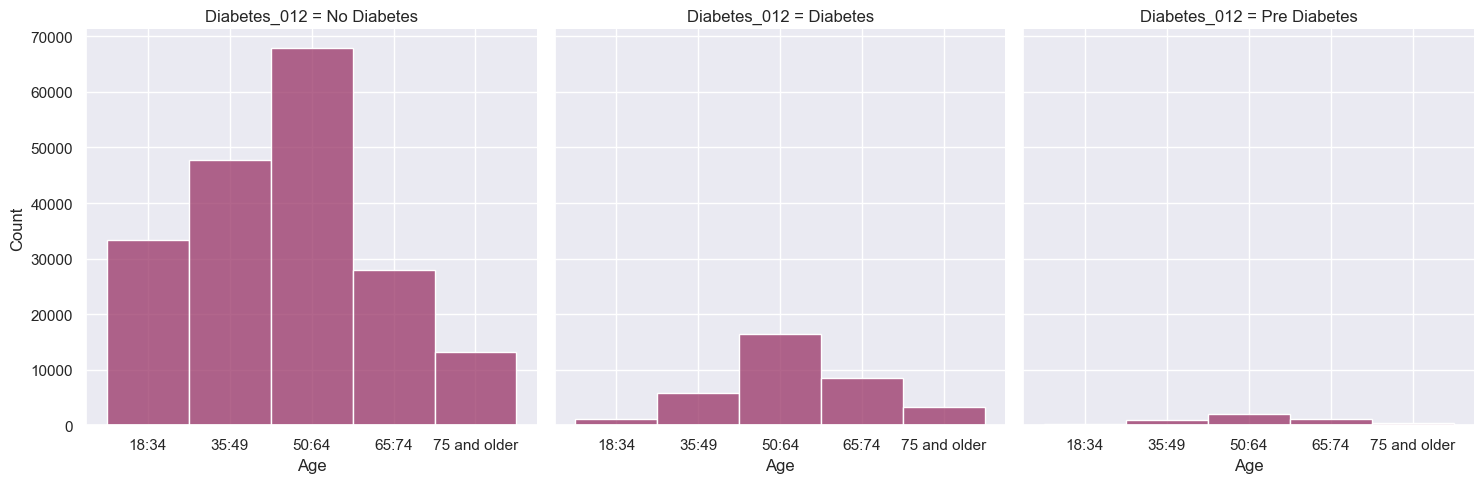

In [52]:
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,col='Diabetes_012',x=age,color='#993366');

people from 50 to 64 have higher chance to develop diabetes


# PhysHlth

<Figure size 1200x500 with 0 Axes>

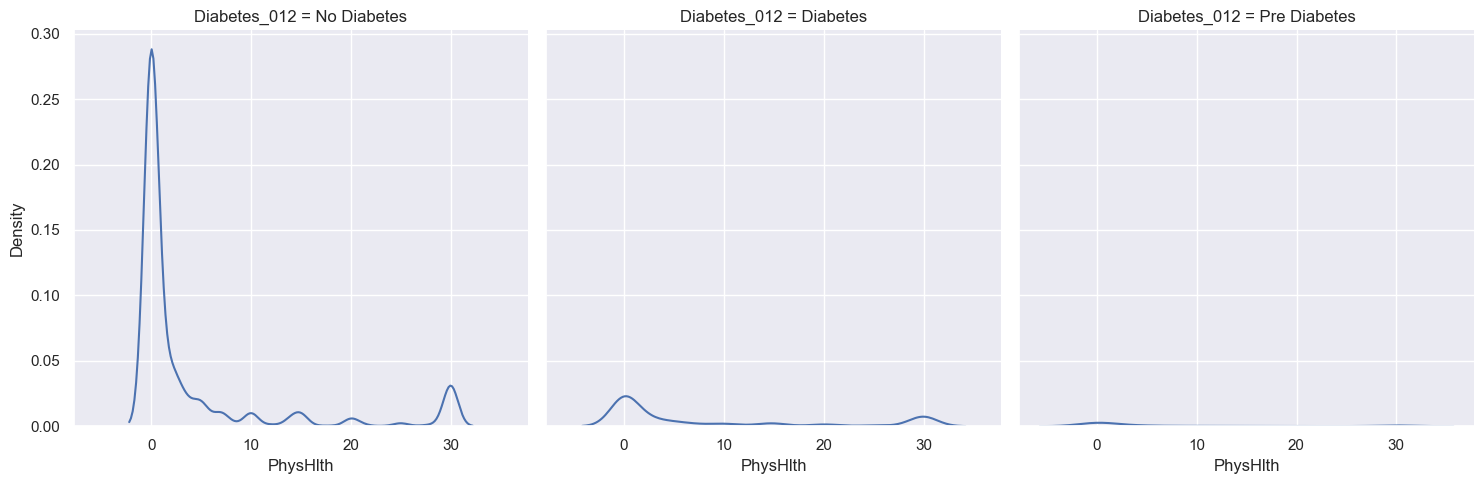

In [53]:
plt.figure(figsize=(12,5))
sns.displot(x='PhysHlth', col='Diabetes_012' , data = df_vis, kind="kde")
plt.show()

# MentHlth

<Figure size 1200x500 with 0 Axes>

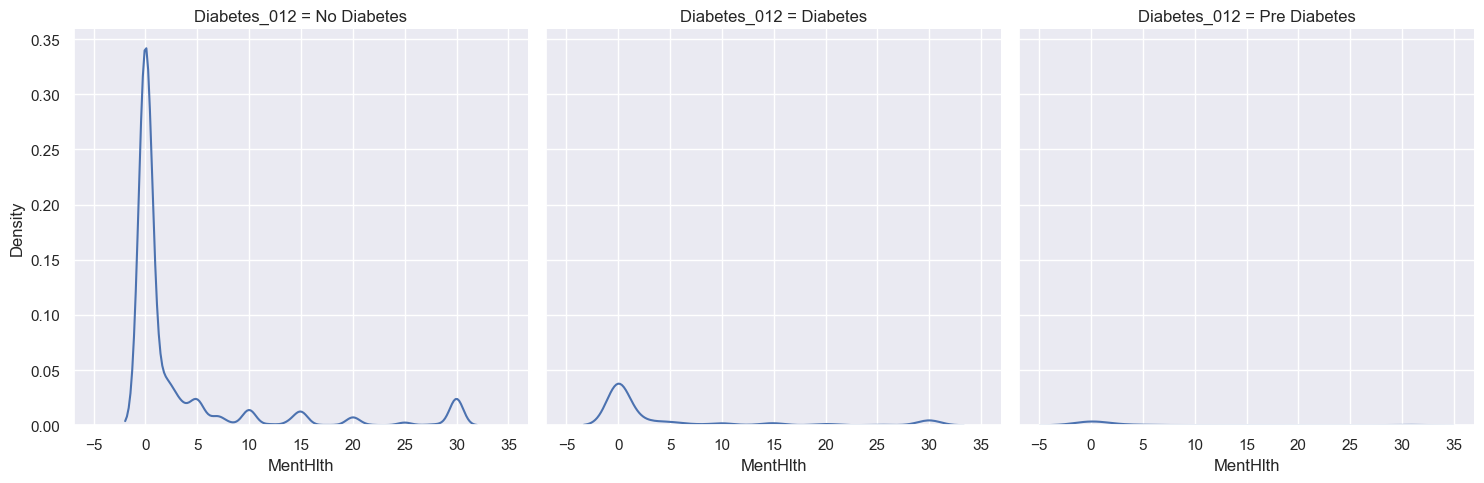

In [54]:
plt.figure(figsize=(12,5))
x= sns.displot(x='MentHlth', col='Diabetes_012', data = df_vis, kind="kde")
plt.show()

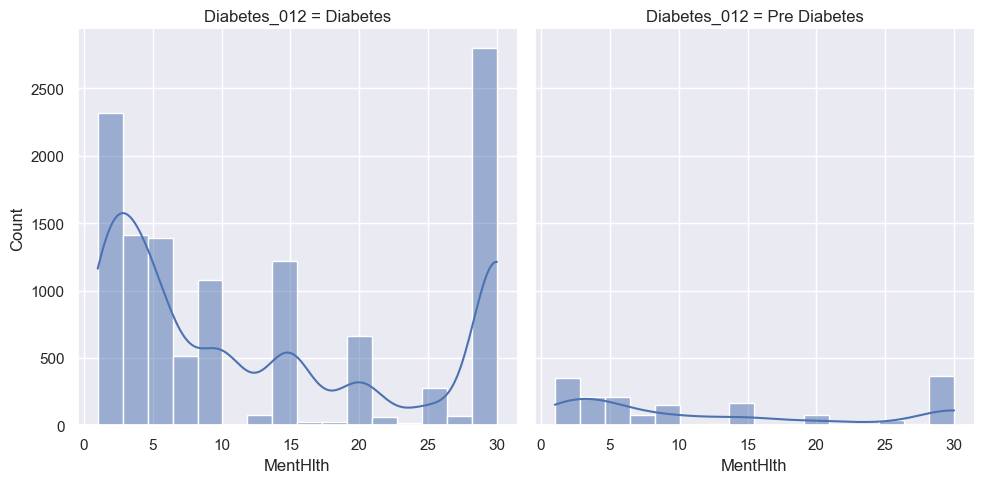

In [55]:
sns.displot(data=df_vis.loc[(df_vis['MentHlth']>0)&(df_vis['Diabetes_012']!="No Diabetes")],x='MentHlth',col='Diabetes_012',col_wrap=2,kde=True);

Mental health doesn't have effect on diabetes


# GenHlth

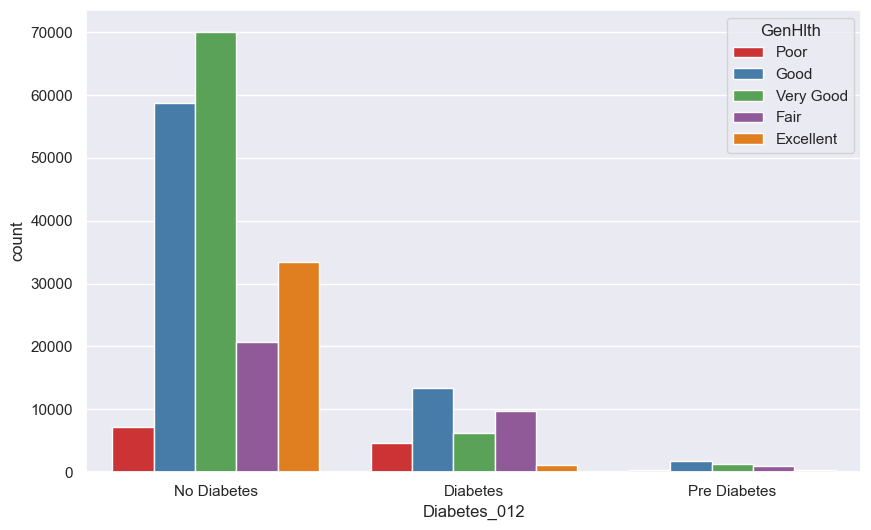

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='Diabetes_012',hue='GenHlth',palette='Set1');

# Income

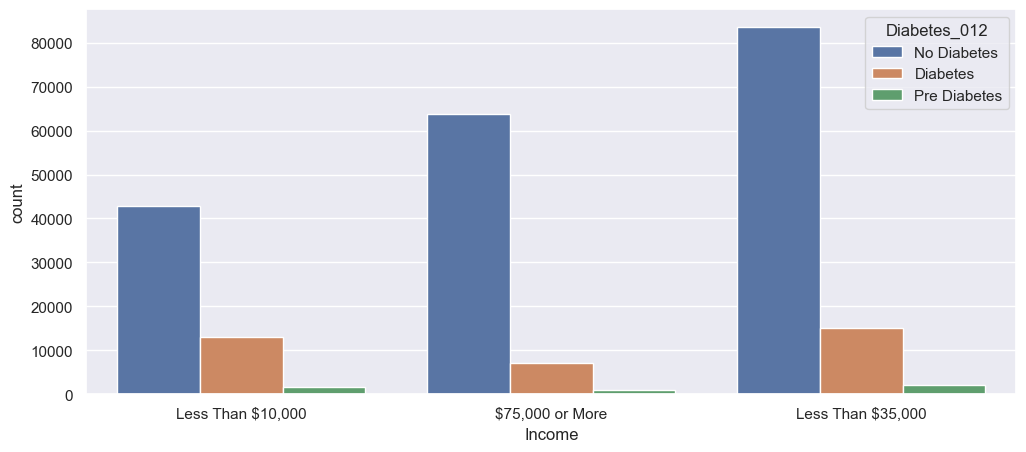

In [57]:
plt.figure(figsize=(12,5))
sns.countplot(x='Income', hue='Diabetes_012' , data = df_vis)
plt.show()

<Figure size 1000x600 with 0 Axes>

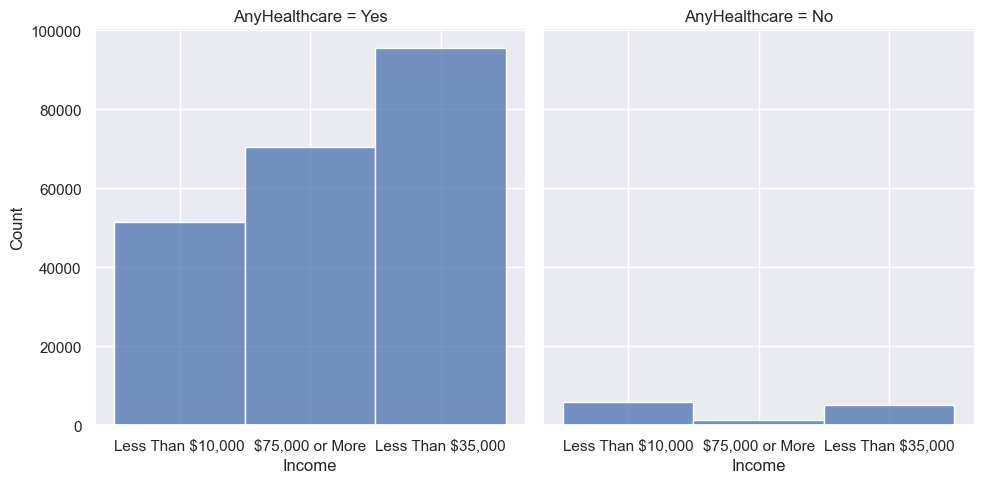

In [58]:
# The effect of the income on the healthcare
plt.figure(figsize=(10,6))
sns.displot(data=df_vis,x='Income',col='AnyHealthcare');

If the person has more income he/she will has good healthcare


# Education

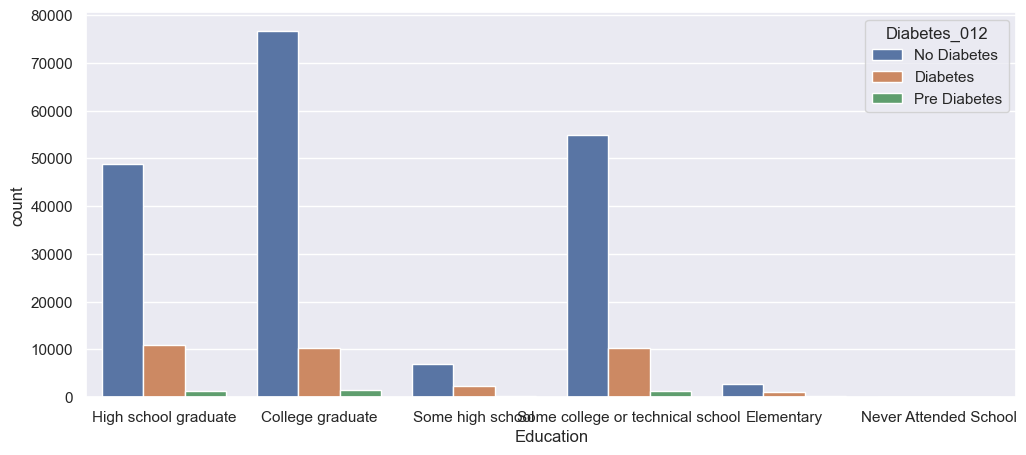

In [59]:
plt.figure(figsize=(12,5))
sns.countplot(x='Education', hue='Diabetes_012' , data = df_vis)
plt.show()

# Veggies

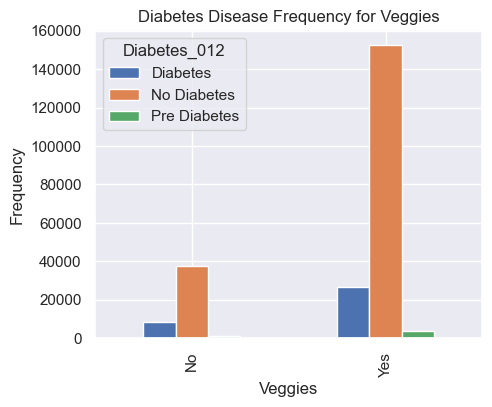

In [60]:
pd.crosstab(df_vis.Veggies,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Veggies')
plt.xlabel("Veggies")
plt.ylabel('Frequency')
plt.show()

# Fruits

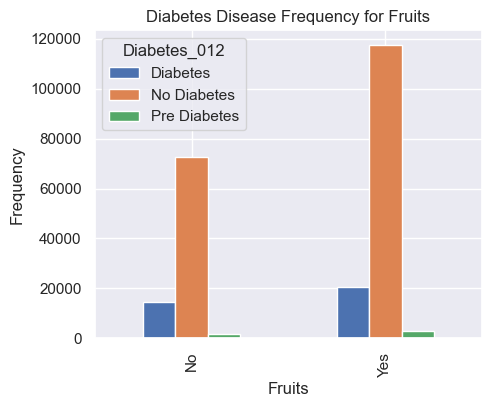

In [61]:
pd.crosstab(df_vis.Fruits,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Fruits')
plt.xlabel("Fruits")
plt.ylabel('Frequency')
plt.show()

# PhysActivity

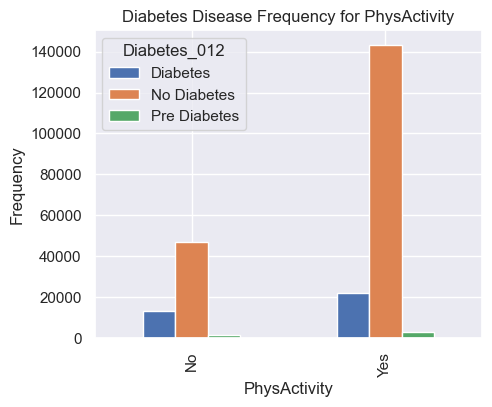

In [62]:
pd.crosstab(df_vis.PhysActivity,df_vis.Diabetes_012).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='PhysActivity', ylabel='count'>

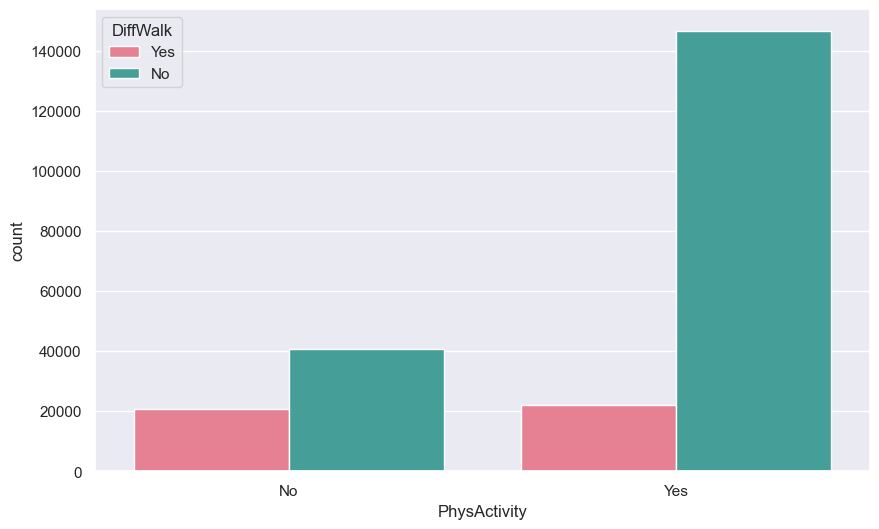

In [63]:
plt.figure(figsize = (10,6))
sns.countplot(data=df_vis,x=df_vis['PhysActivity'],hue='DiffWalk',palette='husl')

<Figure size 1400x600 with 0 Axes>

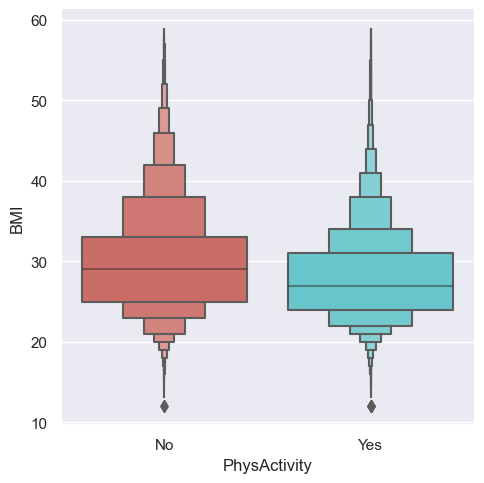

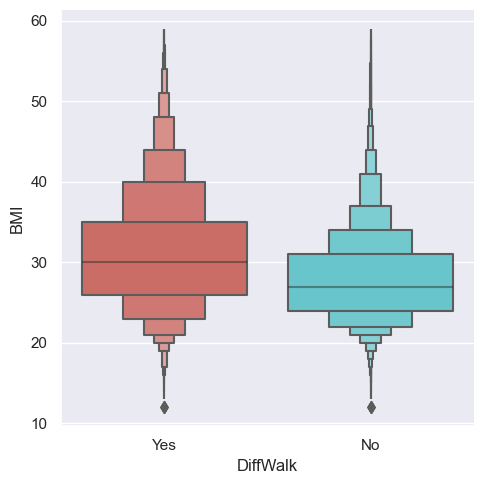

In [64]:
plt.figure(figsize = (14,6))
# plt.subplot(1, 1, 1)
x=sns.catplot(data=df_vis[df_vis['BMI']<60],x="PhysActivity", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

y=sns.catplot(data=df_vis[df_vis['BMI']<60],x="DiffWalk", y="BMI", kind="boxen",aspect=1,palette='hls')
plt.show()

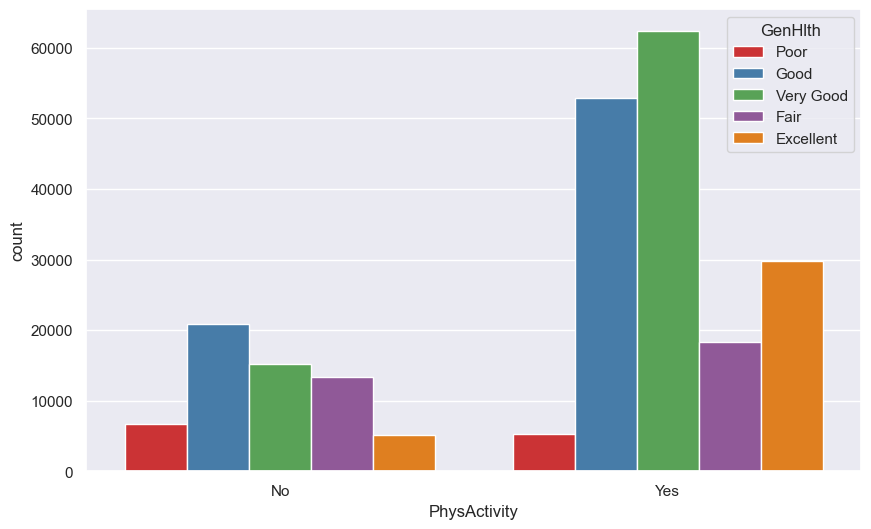

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_vis,x='PhysActivity',hue='GenHlth',palette='Set1');

physical activity dramitically affects the genral health as people who do physical have way better general health

# The summary of visualization:

1:male and female are equally vulnerable for Diabetes.

2:people older than 45 are more vulnerable for diabetes then the younger ones.when the age increase the number of diabetic people also increas.

3:More than half of the diabetics are obese , alomst half of the pre diabetics are obese

4:percentages of diabetics and pre diabetics who suffers from obesity and overweight are much higher than percentage of non diabetic who suffers from obesity and overweight

5:when Education is going Higher the number of Diabetic people is dicreasing.

6:people with lower income has more risk of diabetes then the Higher ones.

7:GenHlth has a major effect on diabetes.when GenHlth is not good then the risk of diabetes increases rapidly.

8:MentHlth is a major factor which causes Diabetes.when Menthlth is not stable for long time then the risk of diabetes increases.

9:same goes with PhysHlth

10:Physical activity reduces the risk of diabetes.

11:Eating at least one fruit a day reduces the risk of diabetes.

12:Eating at least one veggies a day slower the risk of diabetes.

# Preprocessing

[Text(0, 0, 'Diabetes_012'),
 Text(1, 0, 'HighBP'),
 Text(2, 0, 'HighChol'),
 Text(3, 0, 'CholCheck'),
 Text(4, 0, 'BMI'),
 Text(5, 0, 'Smoker'),
 Text(6, 0, 'Stroke'),
 Text(7, 0, 'HeartDiseaseorAttack'),
 Text(8, 0, 'PhysActivity'),
 Text(9, 0, 'Fruits'),
 Text(10, 0, 'Veggies'),
 Text(11, 0, 'HvyAlcoholConsump'),
 Text(12, 0, 'AnyHealthcare'),
 Text(13, 0, 'NoDocbcCost'),
 Text(14, 0, 'GenHlth'),
 Text(15, 0, 'MentHlth'),
 Text(16, 0, 'PhysHlth'),
 Text(17, 0, 'DiffWalk'),
 Text(18, 0, 'Sex'),
 Text(19, 0, 'Age'),
 Text(20, 0, 'Education'),
 Text(21, 0, 'Income')]

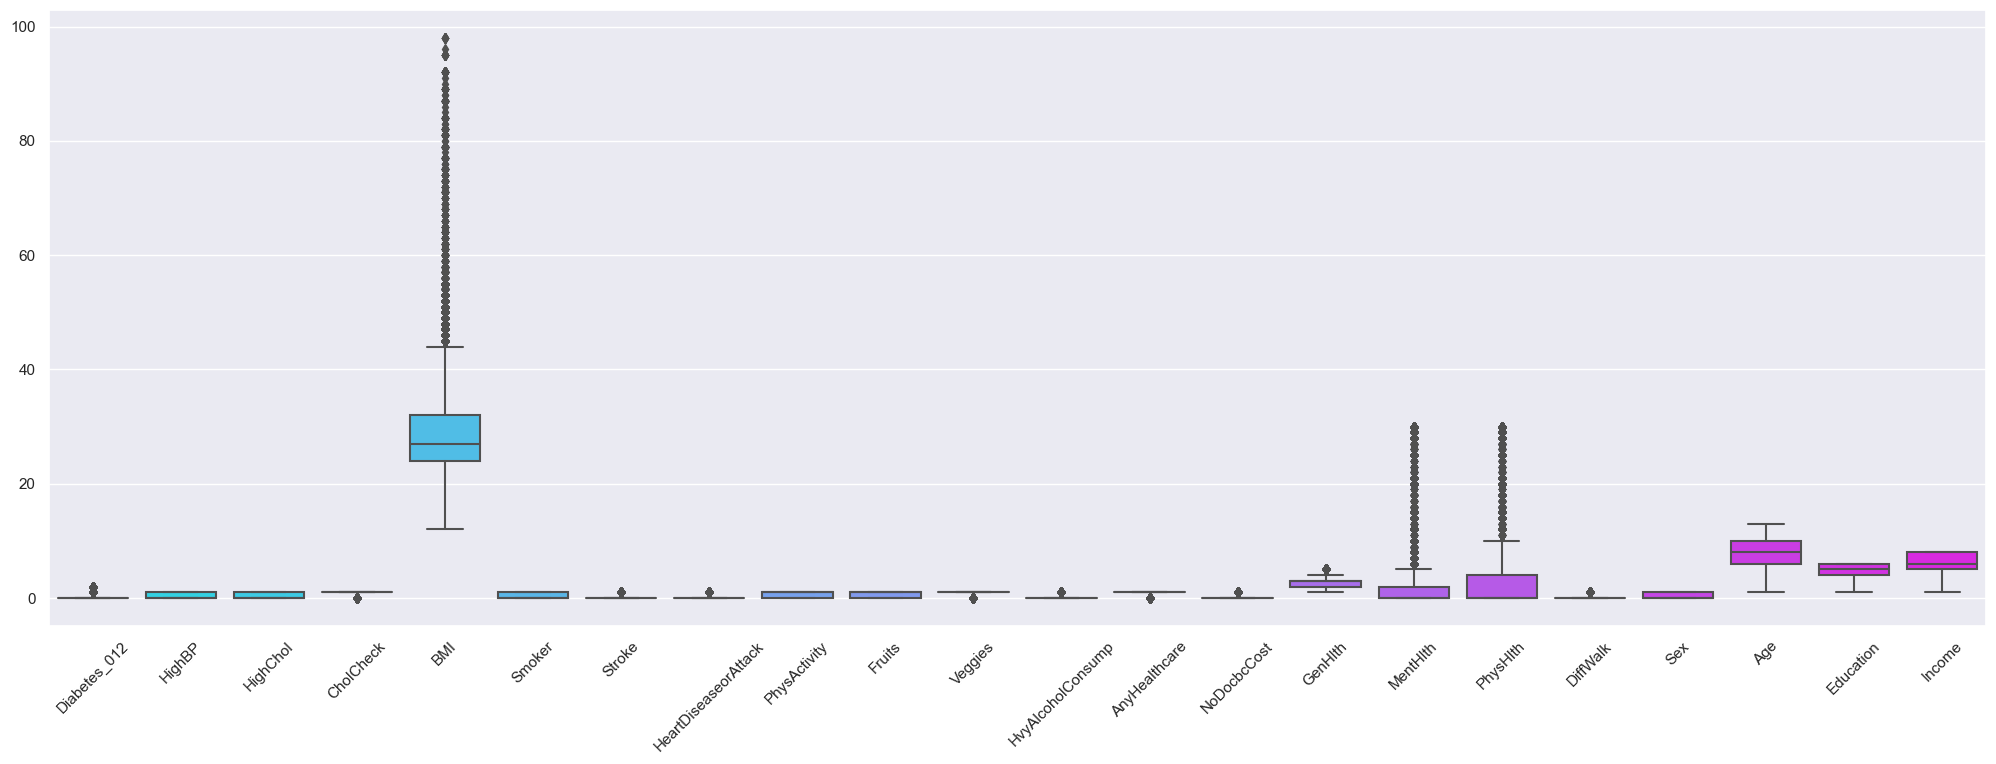

In [66]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=45)

In [67]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

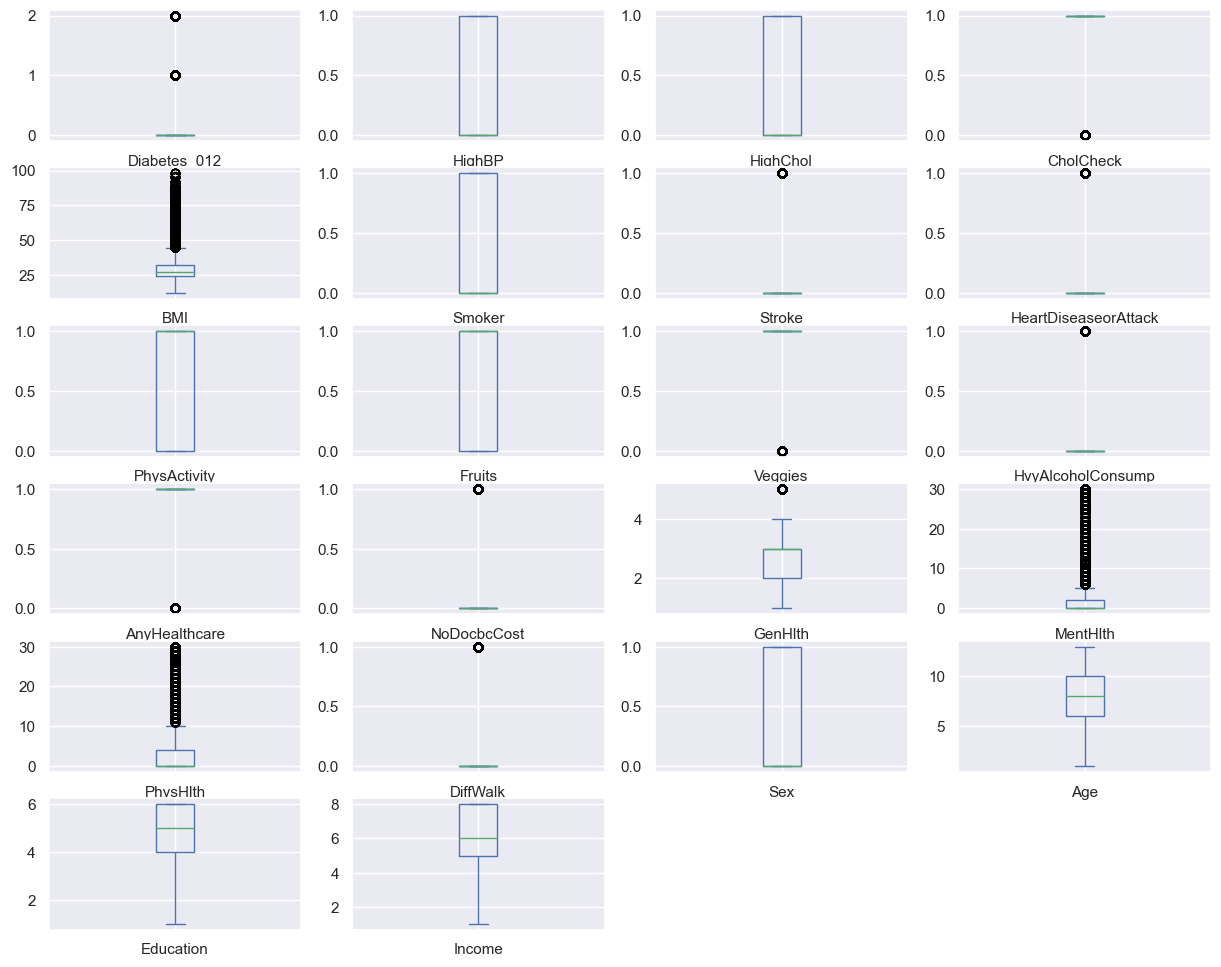

In [68]:
data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

# Handling the outliers of the BMI


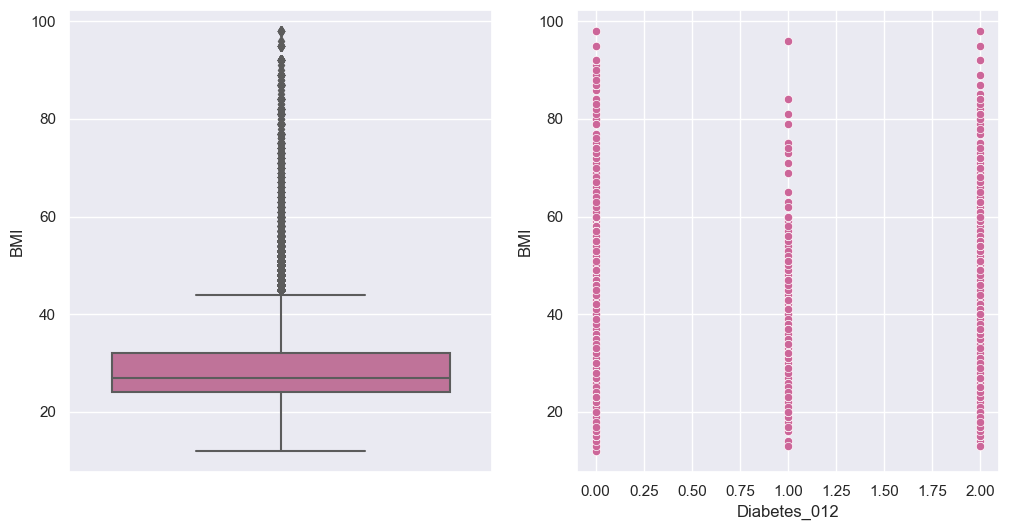

In [69]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=data,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()


In [70]:
x=data[data['BMI']>=70]
x.shape

(599, 22)

In [71]:
df=data.copy()

In [72]:
df=data[data['BMI']<70]

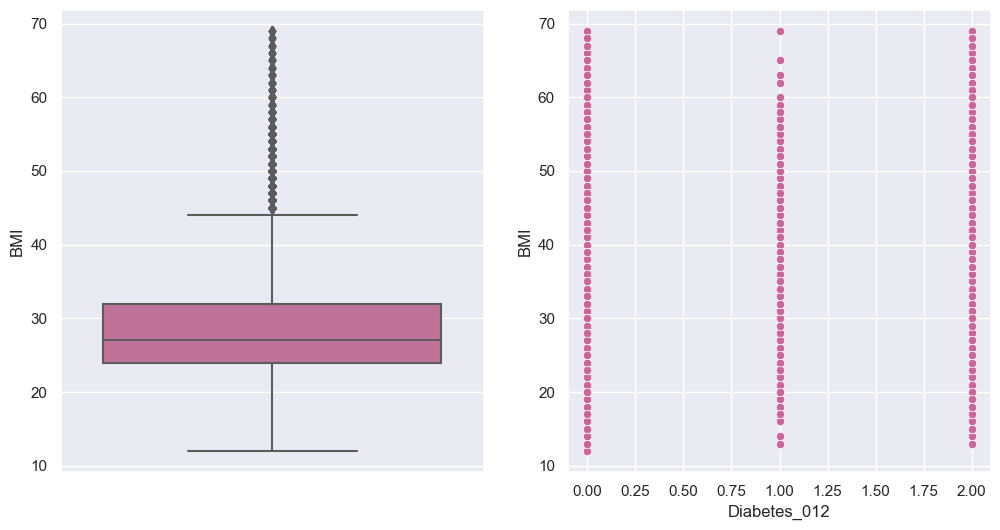

In [73]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df,y='BMI',color='#cc6699')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Diabetes_012',y='BMI',color='#cc6699')
plt.show()

In [74]:
df['Diabetes_012'].value_counts()

Diabetes_012
0    189549
2     35016
1      4617
Name: count, dtype: int64

# Outlier detection

In [75]:
from sklearn.ensemble import IsolationForest
model = IsolationForest()
model.fit(df)
#df['anomailes_scores']=model.decision_function(df)
df['anomaly']= model.predict(df)

In [76]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,-1
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,-1
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,-1
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,1
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,1
253676,2,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,-1
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,1
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,1


# Exclude rows including outliers


In [77]:
df[df['anomaly']==-1]


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,-1
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,-1
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,-1
8,2,1,1,1,30,1,0,1,0,1,...,0,5,30,30,1,0,9,5,1,-1
11,0,1,1,1,34,1,0,0,0,1,...,0,3,0,30,1,0,10,5,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253670,2,1,1,1,25,0,0,1,0,1,...,0,5,15,0,1,0,13,6,4,-1
253671,0,1,1,1,23,0,1,1,0,0,...,1,4,0,5,0,1,8,3,2,-1
253672,0,1,0,1,30,1,0,1,1,1,...,0,3,0,0,0,1,12,2,1,-1
253676,2,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,-1


In [78]:
df[df['anomaly']==-1].shape


(78603, 23)

In [79]:
df.drop(df[df['anomaly']==-1].index,inplace = True)


In [80]:
df.shape


(150579, 23)

In [81]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,anomaly
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,1
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,1
5,0,1,1,1,25,1,0,0,1,1,...,0,2,0,2,0,1,10,6,8,1
6,0,1,0,1,30,1,0,0,0,0,...,0,3,0,14,0,0,9,6,7,1
7,0,1,1,1,25,1,0,0,1,0,...,0,3,0,0,1,0,11,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0,1,0,1,42,0,0,0,1,1,...,0,3,14,4,0,1,3,6,8,1
253674,0,0,0,1,27,0,0,0,0,0,...,0,1,0,0,0,0,3,6,5,1
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,1
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,1


# Drop column(anomaly)


In [82]:
df.drop(columns=['anomaly'], inplace=True)


In [83]:
df.shape


(150579, 22)

# Scaling Data


In [84]:
x = df.drop(['Diabetes_012'],axis=1)
y = df['Diabetes_012']

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [86]:
scaled_features = scaler.transform(x)
x = pd.DataFrame(scaled_features,columns=df.columns[1:])
x.head(10)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.289717,-0.798354,0.171903,-0.116678,-0.838059,-0.081641,-0.184211,0.452182,0.711983,0.406539,...,0.120694,-0.147564,-0.287654,-0.365371,-0.369793,-0.191169,-0.880498,1.030883,-2.467574,-0.288001
1,1.289717,1.252577,0.171903,-0.688031,-0.838059,-0.081641,-0.184211,0.452182,0.711983,0.406539,...,0.120694,-0.147564,-0.287654,0.285810,-0.369793,-0.191169,-0.880498,1.030883,-0.198490,-1.452117
2,1.289717,1.252577,0.171903,-0.497580,1.193234,-0.081641,-0.184211,0.452182,0.711983,0.406539,...,0.120694,-0.147564,-0.287654,-0.365371,0.129425,-0.191169,1.135721,0.706040,0.936053,0.876116
3,1.289717,-0.798354,0.171903,0.454674,1.193234,-0.081641,-0.184211,-2.211501,-1.404527,-2.459790,...,0.120694,-0.147564,0.913228,-0.365371,3.124739,-0.191169,-0.880498,0.381196,0.936053,0.294058
4,1.289717,1.252577,0.171903,-0.497580,1.193234,-0.081641,-0.184211,0.452182,-1.404527,0.406539,...,0.120694,-0.147564,0.913228,-0.365371,-0.369793,5.230962,-0.880498,1.030883,-1.333032,-1.452117
5,-0.775364,-0.798354,0.171903,-0.688031,-0.838059,-0.081641,-0.184211,-2.211501,-1.404527,0.406539,...,0.120694,-0.147564,-0.287654,-0.365371,-0.369793,-0.191169,1.135721,0.056353,-1.333032,-2.034176
6,-0.775364,-0.798354,0.171903,-0.497580,1.193234,-0.081641,-0.184211,0.452182,0.711983,0.406539,...,0.120694,-0.147564,0.913228,-0.365371,-0.369793,-0.191169,1.135721,1.680570,0.936053,0.876116
7,-0.775364,-0.798354,0.171903,-0.307129,1.193234,-0.081641,-0.184211,-2.211501,-1.404527,0.406539,...,0.120694,-0.147564,0.913228,-0.365371,3.374348,-0.191169,-0.880498,-0.268491,-0.198490,0.294058
8,1.289717,-0.798354,0.171903,1.026027,-0.838059,-0.081641,-0.184211,0.452182,-1.404527,-2.459790,...,0.120694,-0.147564,-0.287654,0.719931,-0.369793,-0.191169,-0.880498,-0.593334,0.936053,0.876116
9,1.289717,1.252577,0.171903,-1.259384,-0.838059,-0.081641,-0.184211,0.452182,0.711983,0.406539,...,0.120694,-0.147564,0.913228,-0.365371,-0.369793,-0.191169,-0.880498,0.706040,-1.333032,-2.034176


# Split the data

In [87]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.35, random_state=0, shuffle =True)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
y_pred = knn.predict(x_test)

In [90]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
df['Diabetes_012'].value_counts()

Diabetes_012
0    137860
2     10477
1      2242
Name: count, dtype: int64

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     48145
           1       0.00      0.00      0.00       816
           2       0.30      0.10      0.14      3742

    accuracy                           0.91     52703
   macro avg       0.41      0.36      0.37     52703
weighted avg       0.86      0.91      0.88     52703



In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))

[[47354    16   775]
 [  775     0    41]
 [ 3380     6   356]]


# resampling

In [94]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
xre_train,xre_test,yre_train,yre_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)

NameError: name 'x_resampled' is not defined

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(xre_train,yre_train)

NameError: name 'xre_train' is not defined

In [ ]:
yre_pred = knn_smote.predict(xre_test)

In [ ]:
print(classification_report(yre_test,yre_pred, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     29737
           1       0.96      1.00      0.98     40048
           2       0.94      0.99      0.96     36342

    accuracy                           0.96    106127
   macro avg       0.97      0.96      0.96    106127
weighted avg       0.96      0.96      0.96    106127



# Modeling


# 1.Decision tree


In [ ]:
dt= DecisionTreeClassifier(criterion= 'entropy',max_depth=40)
dt.fit(xre_train , yre_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

In [ ]:
print(dt.score(xre_train , yre_train))
print(dt.score(xre_test, yre_test))

1.0
0.929320531061841


In [ ]:
y_pred_train_dt = dt.predict(xre_train)
acc_train_dt = accuracy_score(yre_train, y_pred_train_dt)

y_pred_test_dt = dt.predict(xre_test)
acc_test_dt = accuracy_score(yre_test, y_pred_test_dt)
print(acc_train_dt)
print(acc_test_dt)

1.0
0.929320531061841


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yre_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     29737
           1       0.94      0.95      0.95     40048
           2       0.91      0.91      0.91     36342

    accuracy                           0.93    106127
   macro avg       0.93      0.93      0.93    106127
weighted avg       0.93      0.93      0.93    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

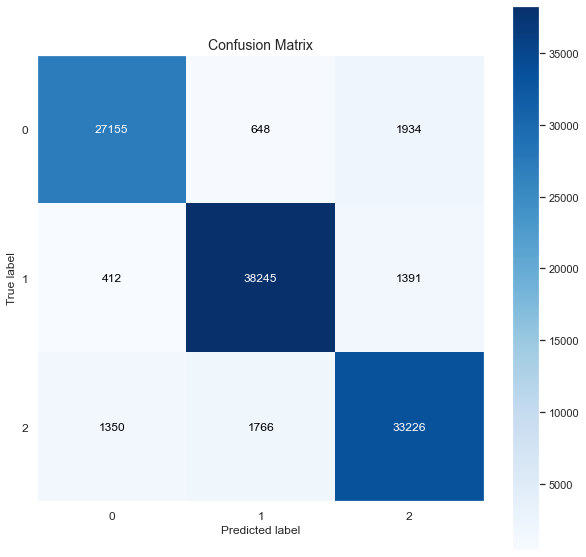

In [ ]:
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_dt,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_dt,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_dt,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_dt,average="micro"))

Precision: 0.929
Recall: 0.929
F-measure: 0.929


In [ ]:
y_pred_prob_dt = dt.predict_proba(xre_test)
roc_auc_score_dt = roc_auc_score(yre_test, y_pred_prob_dt, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_dt)

ROC AUC Score: 0.9458609888698212


# 2. Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_features=16 , max_depth=16)
rf.fit(xre_train,yre_train)

RandomForestClassifier(max_depth=16, max_features=16)

In [ ]:
print(rf.score(xre_train, yre_train))
print(rf.score(xre_test, yre_test))

0.8549713884188719
0.838118480688232


In [ ]:
y_pred_train_rf = rf.predict(xre_train)
acc_train_rf = accuracy_score(yre_train, y_pred_train_rf)

y_pred_test_rf = rf.predict(xre_test)
acc_test_rf = accuracy_score(yre_test, y_pred_test_rf)
print(acc_train_rf)
print(acc_test_rf)

0.8549713884188719
0.838118480688232


In [ ]:
print(classification_report(yre_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     29737
           1       0.86      0.79      0.82     40048
           2       0.75      0.84      0.79     36342

    accuracy                           0.84    106127
   macro avg       0.85      0.84      0.84    106127
weighted avg       0.84      0.84      0.84    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

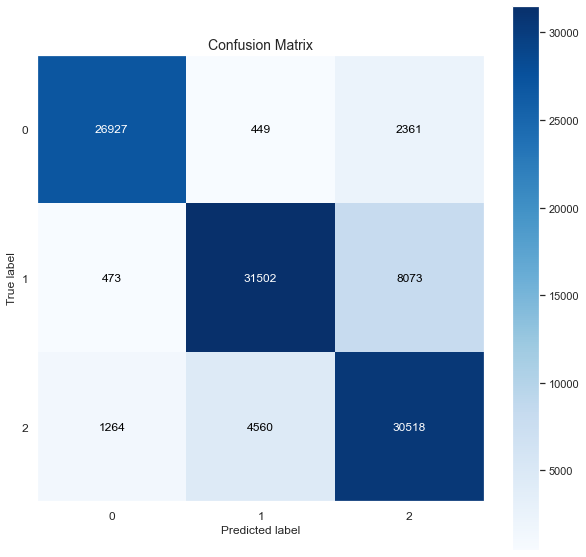

In [ ]:
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_rf,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_rf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_rf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_rf,average="micro"))

Precision: 0.838
Recall: 0.838
F-measure: 0.838


In [ ]:
y_pred_prob_rf = rf.predict_proba(xre_test)
roc_auc_score_rf = roc_auc_score(yre_test, y_pred_prob_rf, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_rf)

ROC AUC Score: 0.9502854884188753


# 3. XGBoost


In [ ]:
xgb= XGBClassifier(max_depth=20)
xgb.fit(xre_train,yre_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
print(xgb.score(xre_train,yre_train))
print(xgb.score(xre_test, yre_test))

1.0
0.9757083494303994


In [ ]:
y_pred_train_xgb = xgb.predict(xre_train)
acc_train_xgb = accuracy_score(yre_train, y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(xre_test)
acc_test_xgb = accuracy_score(yre_test, y_pred_test_xgb)
print(acc_train_xgb)
print(acc_test_xgb)

1.0
0.9757083494303994


In [ ]:
print(classification_report(yre_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     29737
           1       0.99      0.99      0.99     40048
           2       0.98      0.96      0.97     36342

    accuracy                           0.98    106127
   macro avg       0.97      0.98      0.97    106127
weighted avg       0.98      0.98      0.98    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

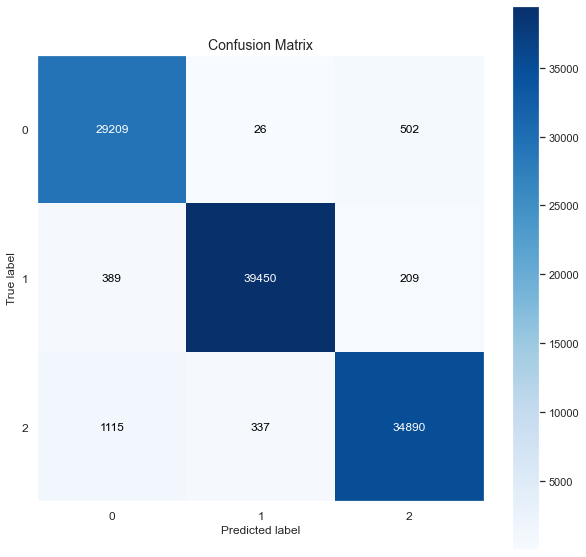

In [ ]:
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_xgb,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_xgb,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_xgb,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_xgb,average="micro"))

Precision: 0.976
Recall: 0.976
F-measure: 0.976


In [ ]:
y_pred_prob_xgb = xgb.predict_proba(xre_test)
roc_auc_score_xgb = roc_auc_score(yre_test, y_pred_prob_xgb, multi_class="ovr")
print('ROC AUC Score:',roc_auc_score_xgb)

ROC AUC Score: 0.9971415486457117


# 4. Logistic Regression


In [ ]:
lg = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=100)
lg.fit(xre_train,yre_train)

LogisticRegression(random_state=100, solver='sag')

In [ ]:
print(lg.score(xre_train,yre_train))
print(lg.score(xre_test, yre_test))

0.5698772750952037
0.5696759542811914


In [ ]:
y_pred_train_lg = lg.predict(xre_train)
acc_train_lg = accuracy_score(yre_train, y_pred_train_lg)

y_pred_test_lg = lg.predict(xre_test)
acc_test_lg = accuracy_score(yre_test, y_pred_test_lg)
print(acc_train_lg)
print(acc_test_lg)

0.5698772750952037
0.5696759542811914


In [ ]:
print(classification_report(yre_test, y_pred_test_lg))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69     29737
           1       0.48      0.47      0.48     40048
           2       0.56      0.59      0.58     36342

    accuracy                           0.57    106127
   macro avg       0.58      0.58      0.58    106127
weighted avg       0.57      0.57      0.57    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

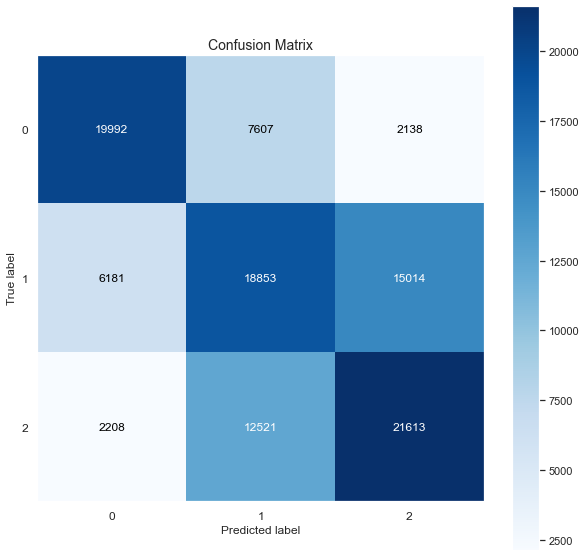

In [ ]:
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_lg,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_lg,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_lg,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_lg,average="micro"))

Precision: 0.570
Recall: 0.570
F-measure: 0.570


In [ ]:
y_pred_prob_lg = lg.predict_proba(xre_test)
roc_auc_score_lg = roc_auc_score(yre_test, y_pred_prob_lg, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_lg)

ROC AUC Score: 0.7627895073345901


# 5- kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xre_train,yre_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#make predictions on test set
y_pred=knn.predict(x_test)

print('Training set score: {:.4f}'.format(knn.score(xre_train,yre_train)))

print('Test set score: {:.4f}'.format(knn.score(xre_test, yre_test)))

Training set score: 0.9923
Test set score: 0.9769


In [ ]:
y_pred_train_knn = knn.predict(xre_train)
acc_train_knn = accuracy_score(yre_train, y_pred_train_knn)

y_pred_test_knn= knn.predict(xre_test)
acc_test_knn = accuracy_score(yre_test, y_pred_test_knn)
print(acc_train_knn)
print(acc_test_knn)

0.9922625561832918
0.976923874226163


              precision    recall  f1-score   support

           0       1.00      0.94      0.96     29737
           1       0.97      1.00      0.99     40048
           2       0.97      0.99      0.98     36342

    accuracy                           0.98    106127
   macro avg       0.98      0.97      0.98    106127
weighted avg       0.98      0.98      0.98    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

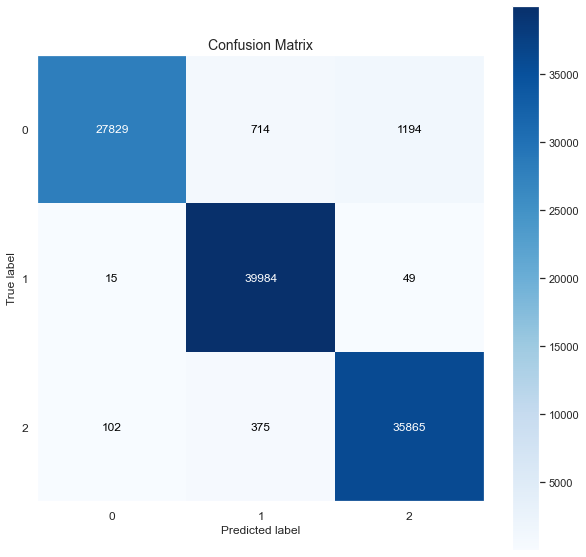

In [ ]:
print(classification_report(yre_test,y_pred_test_knn))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_knn,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_knn,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_knn,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_knn,average="micro"))

NameError: name 'precision_score' is not defined

In [ ]:
y_pred_prob_knn = rf.predict_proba(xre_test)
roc_auc_score_knn = roc_auc_score(yre_test, y_pred_prob_knn, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_knn)

ROC AUC Score: 0.9502854884188753


In [ ]:
import pickle
pickle.dump(knn, open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))

NameError: name 'pickle' is not defined

In [ ]:
print(model.predict([[1,1,1,30,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1]]))

NameError: name 'model' is not defined

# Extra Trees


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

In [ ]:
etc.fit(xre_train,yre_train)

ExtraTreesClassifier()

In [ ]:
yhat = etc.predict(xre_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,etc.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 100.0
Test set Accuracy : 98.93806477145307


In [ ]:
y_pred_prob_etc = etc.predict_proba(xre_test)
roc_auc_score_etc = roc_auc_score(yre_test, y_pred_prob_etc, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_etc)

ROC AUC Score: 0.9995981746731895


In [ ]:
y_pred_train_etc= etc.predict(xre_train)
acc_train_etc= accuracy_score(yre_train, y_pred_train_etc)

y_pred_test_etc= etc.predict(xre_test)
acc_test_etc = accuracy_score(yre_test, y_pred_test_etc)
print(acc_train_etc)
print(acc_test_etc)

1.0
0.9893806477145307


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     29737
           1       0.99      1.00      1.00     40048
           2       0.98      0.99      0.99     36342

    accuracy                           0.99    106127
   macro avg       0.99      0.99      0.99    106127
weighted avg       0.99      0.99      0.99    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

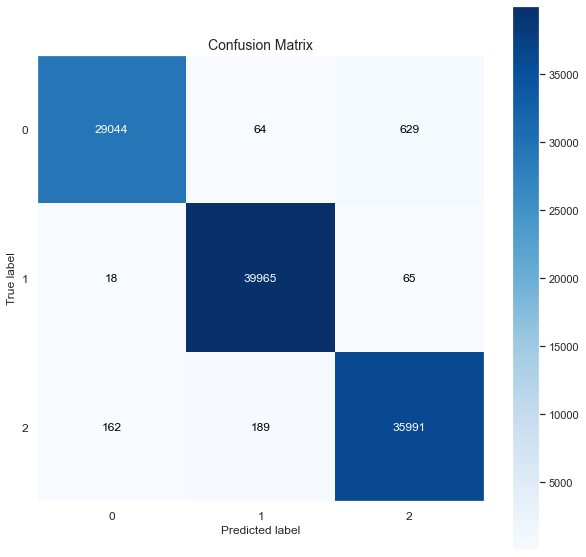

In [ ]:
print(classification_report(yre_test,y_pred_test_etc))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_etc,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_etc,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_etc,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_etc,average="micro"))

Precision: 0.989
Recall: 0.989
F-measure: 0.989


In [ ]:
xre_train.shape

(247627, 21)

# LIGHT GBM


In [ ]:
from lightgbm import LGBMClassifier
light =LGBMClassifier(max_depth=20)

In [ ]:
light.fit(xre_train,yre_train)

LGBMClassifier(max_depth=20)

In [ ]:
yhat = light.predict(xre_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,light.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 84.47705621761763
Test set Accuracy : 84.1472952217626


In [ ]:
y_pred_train_light= light.predict(xre_train)
acc_train_light= accuracy_score(yre_train, y_pred_train_light)

y_pred_test_light=light.predict(xre_test)
acc_test_light = accuracy_score(yre_test, y_pred_test_light)
print(acc_train_light)
print(acc_test_light)

0.8447705621761763
0.8414729522176261


              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29737
           1       0.82      0.81      0.82     40048
           2       0.78      0.77      0.77     36342

    accuracy                           0.84    106127
   macro avg       0.85      0.85      0.85    106127
weighted avg       0.84      0.84      0.84    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

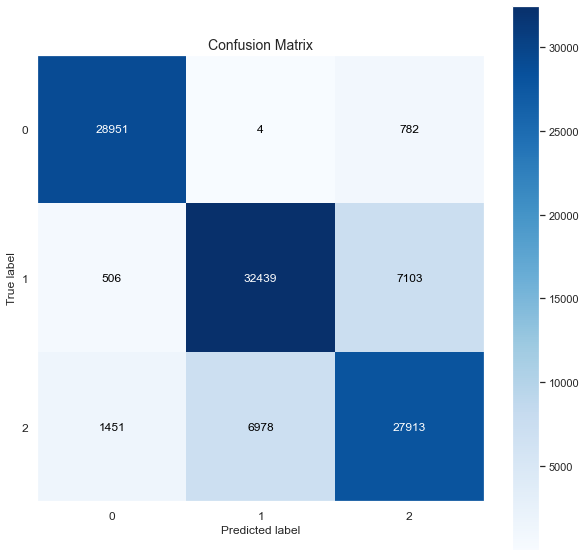

In [ ]:
print(classification_report(yre_test,y_pred_test_light))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_light,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
y_pred_prob_light = light.predict_proba(xre_test)
roc_auc_score_light = roc_auc_score(yre_test, y_pred_prob_light, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_light)

ROC AUC Score: 0.9513431518158703


In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_light,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_light,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_light,average="micro"))

Precision: 0.841
Recall: 0.841
F-measure: 0.841


# Hist Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
model2 =HistGradientBoostingClassifier()

In [ ]:
model2.fit(xre_train,yre_train)

HistGradientBoostingClassifier()

In [ ]:
yhat = model2.predict(xre_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,model2.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 85.95427800684094
Test set Accuracy : 85.43914366749273


In [ ]:
y_pred_prob_model2 = model2.predict_proba(xre_test)
roc_auc_score_model2 = roc_auc_score(yre_test, y_pred_prob_model2, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_model2)

ROC AUC Score: 0.9581148905107888


In [ ]:
y_pred_train_model2= model2.predict(xre_train)
acc_train_model2= accuracy_score(yre_train, y_pred_train_model2)

y_pred_test_model2= model2.predict(xre_test)
acc_test_model2 = accuracy_score(yre_test, y_pred_test_model2)
print(acc_train_model2)
print(acc_test_model2)

0.8595427800684093
0.8543914366749272


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     29737
           1       0.84      0.82      0.83     40048
           2       0.80      0.79      0.80     36342

    accuracy                           0.85    106127
   macro avg       0.86      0.86      0.86    106127
weighted avg       0.85      0.85      0.85    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

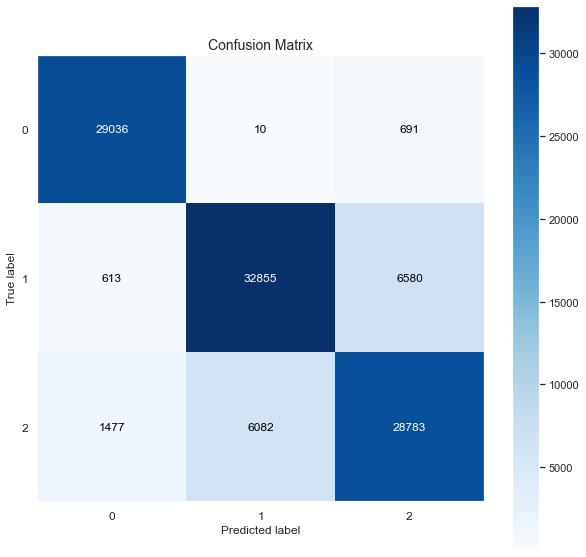

In [ ]:
print(classification_report(yre_test,y_pred_test_model2))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_model2,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_model2,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_model2,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_model2,average="micro"))

Precision: 0.854
Recall: 0.854
F-measure: 0.854


# CATboost


In [ ]:
from catboost import CatBoostClassifier
CAT =CatBoostClassifier()
CAT.fit(xre_train,yre_train)

Learning rate set to 0.104811
0:	learn: 1.0589495	total: 315ms	remaining: 5m 15s
1:	learn: 1.0246897	total: 439ms	remaining: 3m 39s
2:	learn: 1.0001021	total: 561ms	remaining: 3m 6s
3:	learn: 0.9794627	total: 675ms	remaining: 2m 48s
4:	learn: 0.9594289	total: 803ms	remaining: 2m 39s
5:	learn: 0.9421429	total: 929ms	remaining: 2m 33s
6:	learn: 0.9277758	total: 1.04s	remaining: 2m 27s
7:	learn: 0.9135046	total: 1.15s	remaining: 2m 22s
8:	learn: 0.9020421	total: 1.22s	remaining: 2m 14s
9:	learn: 0.8901810	total: 1.32s	remaining: 2m 10s
10:	learn: 0.8789100	total: 1.43s	remaining: 2m 8s
11:	learn: 0.8700706	total: 1.53s	remaining: 2m 5s
12:	learn: 0.8603683	total: 1.63s	remaining: 2m 3s
13:	learn: 0.8501967	total: 1.73s	remaining: 2m 2s
14:	learn: 0.8435587	total: 1.82s	remaining: 1m 59s
15:	learn: 0.8364047	total: 1.92s	remaining: 1m 58s
16:	learn: 0.8295909	total: 2.02s	remaining: 1m 56s
17:	learn: 0.8210786	total: 2.13s	remaining: 1m 56s
18:	learn: 0.8107793	total: 2.24s	remaining: 1m 5

In [ ]:
CAT.fit(xre_train,yre_train)

Learning rate set to 0.104811
0:	learn: 1.0589495	total: 111ms	remaining: 1m 51s
1:	learn: 1.0246897	total: 207ms	remaining: 1m 43s
2:	learn: 1.0001021	total: 302ms	remaining: 1m 40s
3:	learn: 0.9794627	total: 398ms	remaining: 1m 39s
4:	learn: 0.9594289	total: 519ms	remaining: 1m 43s
5:	learn: 0.9421429	total: 631ms	remaining: 1m 44s
6:	learn: 0.9277758	total: 754ms	remaining: 1m 46s
7:	learn: 0.9135046	total: 893ms	remaining: 1m 50s
8:	learn: 0.9020421	total: 1s	remaining: 1m 50s
9:	learn: 0.8901810	total: 1.14s	remaining: 1m 53s
10:	learn: 0.8789100	total: 1.29s	remaining: 1m 56s
11:	learn: 0.8700706	total: 1.43s	remaining: 1m 57s
12:	learn: 0.8603683	total: 1.57s	remaining: 1m 59s
13:	learn: 0.8501967	total: 1.71s	remaining: 2m
14:	learn: 0.8435587	total: 1.82s	remaining: 1m 59s
15:	learn: 0.8364047	total: 1.94s	remaining: 1m 59s
16:	learn: 0.8295909	total: 2.08s	remaining: 2m
17:	learn: 0.8210786	total: 2.21s	remaining: 2m
18:	learn: 0.8107793	total: 2.35s	remaining: 2m 1s
19:	lear

In [ ]:
yhat = CAT.predict(xre_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,CAT.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 89.80321208915021
Test set Accuracy : 88.94720476410339


In [ ]:
y_pred_prob_CAT = CAT.predict_proba(xre_test)
roc_auc_score_CAT = roc_auc_score(yre_test, y_pred_prob_CAT, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_CAT)

ROC AUC Score: 0.9731167864417974


In [ ]:
y_pred_train_CAT= CAT.predict(xre_train)
acc_train_CAT = accuracy_score(yre_train, y_pred_train_CAT)

y_pred_test_CAT= CAT.predict(xre_test)
acc_test_CAT = accuracy_score(yre_test, y_pred_test_CAT)
print(acc_train_CAT)
print(acc_test_CAT)

0.8980321208915021
0.8894720476410338


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     29737
           1       0.88      0.88      0.88     40048
           2       0.85      0.83      0.84     36342

    accuracy                           0.89    106127
   macro avg       0.89      0.90      0.89    106127
weighted avg       0.89      0.89      0.89    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

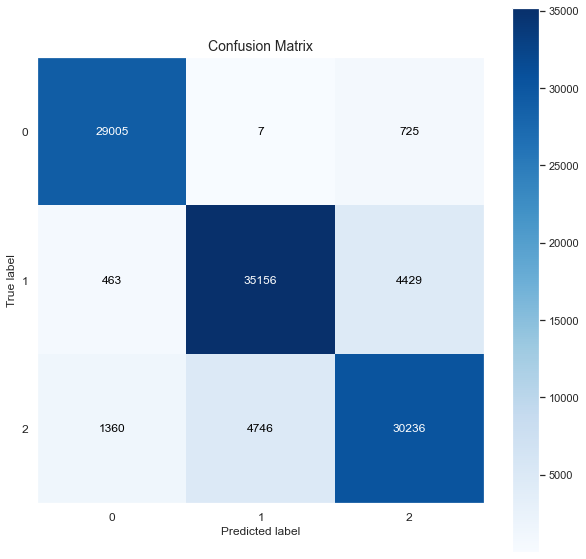

In [ ]:
print(classification_report(yre_test,y_pred_test_CAT))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_CAT,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_CAT,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_CAT,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_CAT,average="micro"))

Precision: 0.889
Recall: 0.889
F-measure: 0.889


# Ada Boost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier( )

In [ ]:
ada_clf.fit(xre_train,yre_train)

AdaBoostClassifier()

In [ ]:
yhat = ada_clf.predict(xre_test)

In [ ]:
from sklearn import metrics
print('Train set Accuracy :',metrics.accuracy_score(yre_train,ada_clf.predict(xre_train))*100)
print('Test set Accuracy :',metrics.accuracy_score(yre_test,yhat)*100)

Train set Accuracy : 66.04610967301628
Test set Accuracy : 65.72220075946743


In [ ]:
y_pred_prob_ada_clf= ada_clf.predict_proba(xre_test)
roc_auc_score_ada_clf = roc_auc_score(yre_test, y_pred_prob_ada_clf, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_ada_clf)

ROC AUC Score: 0.8108679517856062


In [ ]:
y_pred_train_ada_clf = ada_clf.predict(xre_train)
acc_train_ada_clf = accuracy_score(yre_train, y_pred_train_ada_clf)

y_pred_test_ada_clf= ada_clf.predict(xre_test)
acc_test_ada_clf = accuracy_score(yre_test, y_pred_test_ada_clf)
print(acc_train_ada_clf)
print(acc_test_ada_clf)

0.6604610967301627
0.6572220075946743


              precision    recall  f1-score   support

           0       0.87      0.78      0.82     29737
           1       0.62      0.55      0.58     40048
           2       0.56      0.67      0.61     36342

    accuracy                           0.66    106127
   macro avg       0.68      0.67      0.67    106127
weighted avg       0.67      0.66      0.66    106127



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

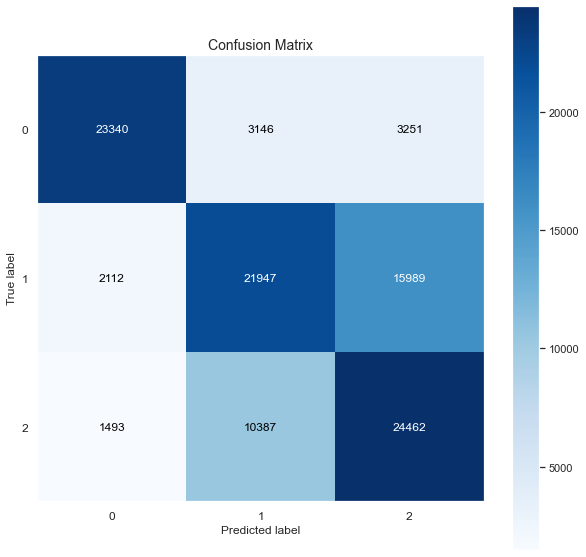

In [ ]:
print(classification_report(yre_test,y_pred_test_ada_clf))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_ada_clf,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_ada_clf,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_ada_clf,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_ada_clf,average="micro"))

Precision: 0.657
Recall: 0.657
F-measure: 0.657


# Bagging


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
tree_clas = DecisionTreeClassifier(random_state=42)

In [ ]:
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score=True,
    random_state = 0
)

In [ ]:
bag_model.fit(xre_train, yre_train)

In [ ]:
y_pred_train_bag_model = bag_model.predict(xre_train)
acc_train_bag_model = accuracy_score(yre_train, y_pred_train_bag_model)

y_pred_test_bag_model = bag_model.predict(xre_test)
acc_test_bag_model = accuracy_score(yre_test, y_pred_test_bag_model)
print(acc_train_bag_model)
print(acc_test_bag_model)

0.9994909117566803
0.958329769744657


              precision    recall  f1-score   support

           0       0.95      0.95      0.95     28736
           1       0.97      0.98      0.97     40080
           2       0.95      0.94      0.95     36415

    accuracy                           0.96    105231
   macro avg       0.96      0.96      0.96    105231
weighted avg       0.96      0.96      0.96    105231



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

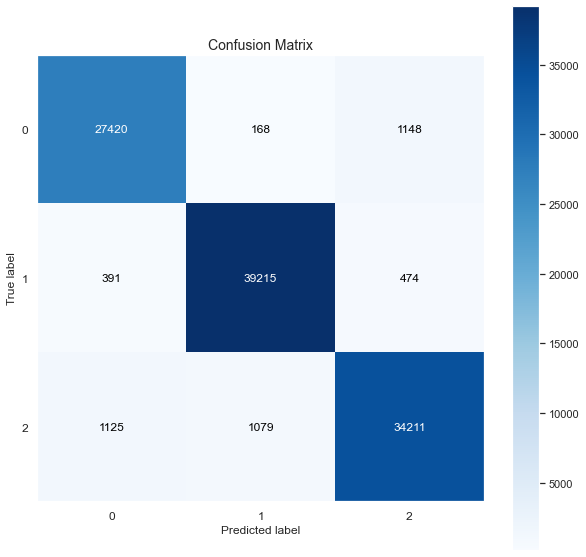

In [ ]:
print(classification_report(yre_test,y_pred_test_bag_model))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_test_bag_model,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

In [ ]:
bag_model.oob_score_

0.9571958605016759

In [ ]:
y_pred_prob_bag_model = bag_model.predict_proba(xre_test)
roc_auc_score_bag_model = roc_auc_score(yre_test, y_pred_prob_bag_model, multi_class="ovr")
print('ROC AUC Score:', roc_auc_score_bag_model)

ROC AUC Score: 0.9928361843483294


In [ ]:
print('Precision: %.3f' % precision_score(yre_test, y_pred_test_bag_model,average="micro"))
print('Recall: %.3f' % recall_score(yre_test, y_pred_test_bag_model,average="micro"))
print('F-measure: %.3f' % f1_score(yre_test, y_pred_test_bag_model,average="micro"))

Precision: 0.958
Recall: 0.958
F-measure: 0.958


# Compare between algorithms


In [ ]:
Performance = pd.DataFrame(
    data = {
        'Model_after_resamppling': ['lg','RF','XGB','DT','bag_model','ada_clf','CAT','H_Gradient','Light_GBM','Extra_tree','KNN'],
        'Test_score': [accuracy_score(yre_test, y_pred_test_lg),
                       accuracy_score(yre_test, y_pred_test_rf),
                       accuracy_score(yre_test, y_pred_test_xgb),
                      accuracy_score(yre_test, y_pred_test_dt),
                     accuracy_score(yre_test, y_pred_test_bag_model),
                     accuracy_score(yre_test, y_pred_test_ada_clf),
                     accuracy_score(yre_test, y_pred_test_CAT),
                     accuracy_score(yre_test, y_pred_test_model2),
                     accuracy_score(yre_test, y_pred_test_light),
                     accuracy_score(yre_test, y_pred_test_etc),
                     accuracy_score(yre_test, y_pred_test_knn)],
        
        'ROC_AUC_Score': [roc_auc_score_lg,
                          roc_auc_score_rf, 
                          roc_auc_score_xgb,
                         roc_auc_score_dt,
                          roc_auc_score_bag_model,
                          roc_auc_score_ada_clf,
                          roc_auc_score_CAT,
                         roc_auc_score_model2,
                          roc_auc_score_light,
                          roc_auc_score_etc,
                         roc_auc_score_knn ]
    }
)


def show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


plt.figure(figsize=(12, 8))
ax = sns.barplot(x="Model_after_resamppling", y="Test_score", data= Performance, palette="Blues")
show_values_on_bars(ax)

NameError: name 'pd' is not defined

In [ ]:
Performance.sort_values('ROC_AUC_Score',ascending=False)


,Model_after_resamppling,Test_score,ROC_AUC_Score
9,Extra_tree,0.987627,0.999463
2,XGB,0.972242,0.996280
4,bag_model,0.958330,0.992836
6,CAT,0.880720,0.969488
1,RF,0.845492,0.956476
10,KNN,0.974893,0.956476
7,H_Gradient,0.842508,0.951766
8,Light_GBM,0.835239,0.947920
3,DT,0.917021,0.936337
5,ada_clf,0.645352,0.817680


Hybrid Model Creation


1. Decision Tree and Random Forest

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[('dt', dt), ('rf', rf)], voting='hard')
ensemble_model.fit(xre_train, yre_train)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=40)),
                             ('rf',
                              RandomForestClassifier(max_depth=16,
                                                     max_features=16))])

In [ ]:
y_pred_hdr = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hdr)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.9050279860497382


2. Random Forest and XGBoost

In [ ]:
ensemble_model = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb)], voting='hard')
ensemble_model.fit(xre_train, yre_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=16,
                                                     max_features=16)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            predictor=None, ...))])

In [ ]:
y_pred_hrx = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hrx)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.930856876775855


3. XGBoost and Logistic Regression

In [ ]:
ensemble_model = VotingClassifier(estimators=[('xgb', xgb), ('lg', lg)], voting='hard')
ensemble_model.fit(xre_train, yre_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob',
                                            predictor=None, ...)),
                             ('lg',
                              LogisticRegression(random_state=100,
                                                 solver='sag'))])

In [ ]:
y_pred_hxl = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hxl)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.782421529777347


4. Logistic Regression and KNN

In [ ]:
ensemble_model = VotingClassifier(estimators=[('lg', lg), ('knn', knn)], voting='hard')
ensemble_model.fit(xre_train, yre_train)

VotingClassifier(estimators=[('lg',
                              LogisticRegression(random_state=100,
                                                 solver='sag')),
                             ('knn', KNeighborsClassifier(n_neighbors=4))])

In [ ]:
y_pred_hlk = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hlk)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.7800838156056675


5. KNN and Extra Tree

In [ ]:
ensemble_model = VotingClassifier(estimators=[('knn', knn), ('etc', etc)], voting='hard')
ensemble_model.fit(xre_train, yre_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('etc', ExtraTreesClassifier())])

In [ ]:
y_pred_hke = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hke)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.9868099704459713


6. Extra Tree and Light GBM

In [ ]:
ensemble_model = VotingClassifier(estimators=[('etc', etc), ('light', light)], voting='hard')
ensemble_model.fit(xre_train, yre_train)

VotingClassifier(estimators=[('etc', ExtraTreesClassifier()),
                             ('light', LGBMClassifier(max_depth=20))])

In [ ]:
y_pred_hel = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hel)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.9066339766798757


7. Light GBM and Hist Gradient Boosting Classifier

In [ ]:
ensemble_model = VotingClassifier(estimators=[('light', light), ('model2', model2)], voting='hard')
ensemble_model.fit(xre_train, yre_train)

VotingClassifier(estimators=[('light', LGBMClassifier(max_depth=20)),
                             ('model2', HistGradientBoostingClassifier())])

In [ ]:
y_pred_hlm2 = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hlm2)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.8387642424760764


8. Hist Gradient Boosting Classifier and Catboost

In [ ]:
ensemble_model = VotingClassifier(estimators=[('model2', model2), ('CAT', CAT)], voting='soft')
ensemble_model.fit(xre_train, yre_train)

Learning rate set to 0.104766
0:	learn: 1.0575759	total: 48.4ms	remaining: 48.4s
1:	learn: 1.0269152	total: 94.9ms	remaining: 47.4s
2:	learn: 0.9978773	total: 146ms	remaining: 48.5s
3:	learn: 0.9738809	total: 193ms	remaining: 48.1s
4:	learn: 0.9533206	total: 250ms	remaining: 49.8s
5:	learn: 0.9354879	total: 305ms	remaining: 50.5s
6:	learn: 0.9209089	total: 354ms	remaining: 50.2s
7:	learn: 0.9068342	total: 405ms	remaining: 50.2s
8:	learn: 0.8944189	total: 458ms	remaining: 50.5s
9:	learn: 0.8838634	total: 511ms	remaining: 50.6s
10:	learn: 0.8740558	total: 564ms	remaining: 50.7s
11:	learn: 0.8654978	total: 607ms	remaining: 50s
12:	learn: 0.8542229	total: 664ms	remaining: 50.4s
13:	learn: 0.8445408	total: 717ms	remaining: 50.5s
14:	learn: 0.8354359	total: 778ms	remaining: 51.1s
15:	learn: 0.8298617	total: 824ms	remaining: 50.7s
16:	learn: 0.8207970	total: 878ms	remaining: 50.8s
17:	learn: 0.8148828	total: 923ms	remaining: 50.4s
18:	learn: 0.8077557	total: 973ms	remaining: 50.2s
19:	learn: 

VotingClassifier(estimators=[('model2', HistGradientBoostingClassifier()),
                             ('CAT',
                              <catboost.core.CatBoostClassifier object at 0x000002CE62DEE890>)],
                 voting='soft')

In [ ]:
y_pred_hmc = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hmc)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.8704659273408026


9. CAtboost and Ada Boost

In [ ]:
ensemble_model = VotingClassifier(estimators=[('CAT', CAT), ('ada_clf', ada_clf)], voting='soft')
ensemble_model.fit(xre_train, yre_train)

Learning rate set to 0.104766
0:	learn: 1.0575759	total: 49.4ms	remaining: 49.3s
1:	learn: 1.0269152	total: 100ms	remaining: 50.1s
2:	learn: 0.9978773	total: 158ms	remaining: 52.5s
3:	learn: 0.9738809	total: 209ms	remaining: 52.1s
4:	learn: 0.9533206	total: 264ms	remaining: 52.5s
5:	learn: 0.9354879	total: 322ms	remaining: 53.4s
6:	learn: 0.9209089	total: 373ms	remaining: 52.9s
7:	learn: 0.9068342	total: 421ms	remaining: 52.3s
8:	learn: 0.8944189	total: 475ms	remaining: 52.3s
9:	learn: 0.8838634	total: 524ms	remaining: 51.9s
10:	learn: 0.8740558	total: 574ms	remaining: 51.6s
11:	learn: 0.8654978	total: 619ms	remaining: 51s
12:	learn: 0.8542229	total: 677ms	remaining: 51.4s
13:	learn: 0.8445408	total: 733ms	remaining: 51.6s
14:	learn: 0.8354359	total: 788ms	remaining: 51.7s
15:	learn: 0.8298617	total: 838ms	remaining: 51.6s
16:	learn: 0.8207970	total: 889ms	remaining: 51.4s
17:	learn: 0.8148828	total: 934ms	remaining: 51s
18:	learn: 0.8077557	total: 989ms	remaining: 51.1s
19:	learn: 0.8

VotingClassifier(estimators=[('CAT',
                              <catboost.core.CatBoostClassifier object at 0x000002CE62DEE890>),
                             ('ada_clf', AdaBoostClassifier())],
                 voting='soft')

In [ ]:
y_pred_cad = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_cad)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.8803299407969134


10. Ada Boost and Bagging

In [ ]:
ensemble_model = VotingClassifier(estimators=[('ada_clf', ada_clf ), ('bag_model', bag_model)], voting='hard')
ensemble_model.fit(xre_train, yre_train)

VotingClassifier(estimators=[('ada_clf', AdaBoostClassifier()),
                             ('bag_model',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                max_samples=0.8,
                                                n_estimators=100,
                                                oob_score=True,
                                                random_state=0))])

In [ ]:
y_pred_hab = ensemble_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_hab)
print("Accuracy of hybrid model:", accuracy)

Accuracy of hybrid model: 0.8284821012819417


Hybrid Model using Stacking

In [ ]:
# Build the stacking model
stack_model = StackingClassifier(classifiers=[rf, xgb], meta_classifier=xgb)

# Train the stacking model on the training data
stack_model.fit(xre_train, yre_train)

# Evaluate the stacking model on the testing data
y_pred_rf = stack_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_rf)
print("Accuracy of stacking model:", accuracy)

Accuracy of stacking model: 0.9722420199370908


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28736
           1       0.99      0.98      0.99     40080
           2       0.98      0.96      0.97     36415

    accuracy                           0.97    105231
   macro avg       0.97      0.97      0.97    105231
weighted avg       0.97      0.97      0.97    105231



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

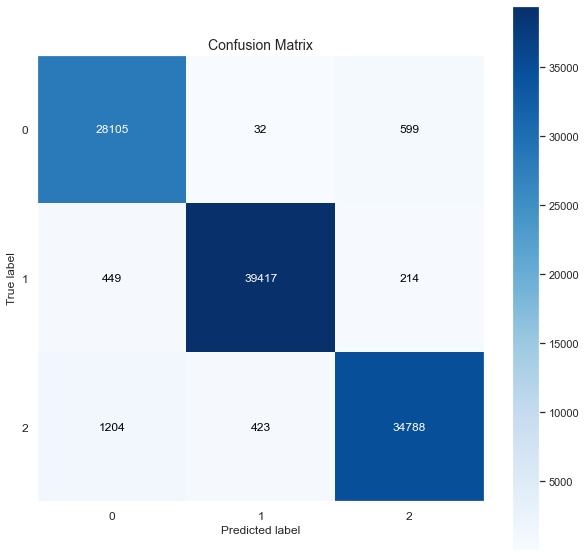

In [ ]:
print(classification_report(yre_test,y_pred_rf))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_rf,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)

The hybrid model using stacking with knn and extra tree

In [ ]:
# Build the stacking model
stack_model = StackingClassifier(classifiers=[knn, etc], meta_classifier=etc)

# Train the stacking model on the training data
stack_model.fit(xre_train, yre_train)

# Evaluate the stacking model on the testing data
y_pred_main = stack_model.predict(xre_test)
accuracy = accuracy_score(yre_test, y_pred_main)
print("Accuracy of stacking model:", accuracy)

Accuracy of stacking model: 0.9874276591498703


In [ ]:
cm = confusion_matrix(yre_test, y_pred_main)
print(classification_report(yre_test,y_pred_main))
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28736
           1       0.99      1.00      1.00     40080
           2       0.98      0.99      0.98     36415

    accuracy                           0.99    105231
   macro avg       0.99      0.99      0.99    105231
weighted avg       0.99      0.99      0.99    105231

[[27976    52   708]
 [   29 39985    66]
 [  235   233 35947]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     28736
           1       0.99      1.00      1.00     40080
           2       0.98      0.99      0.98     36415

    accuracy                           0.99    105231
   macro avg       0.99      0.99      0.99    105231
weighted avg       0.99      0.99      0.99    105231



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

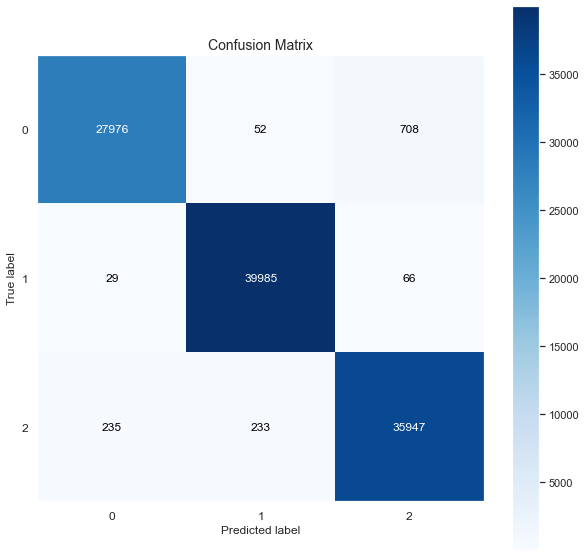

In [ ]:
print(classification_report(yre_test,y_pred_main))
skplt.metrics.plot_confusion_matrix(yre_test,y_pred_main,figsize=(10,10),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Blues)